<h1><center> Exploratory Analysis and Research Proposal</h1></center>
<h2><center> A Culture of Hate: How Understanding Hate Crimes in the United States Can Shape Our Future</h2></center>

## Project Outline

[1. About the Dataset](#1.-About-the-Dataset)


[2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
- [2.1: Data Loading and Initial Exploration](#2.1:-Data-Loading-and-Initial-Exploration)
- [2.2: Cleaning/Visualizing Variables and Feature Engineering](#2.2:-Cleaning/Visualizing-Variables-and-Feature-Engineering)
    - [2.2a: Question 1: Which states have the highest incidence of hate crimes (per 100k residents)?](#2.2a:-Question-1:-Which-states-have-the-highest-incidence-of-hate-crimes-(per-100k-residents)?)
    - [2.2b: Question 2: Are hate crimes and income level related?](#2.2b:-Question-2:-Are-hate-crimes-and-income-level-related?)
    - [2.2c: Question 3: Are the number of Trump supporters and hate crimes related?](#2.2c:-Question-3:-Are-the-number-of-Trump-supporters-and-hate-crimes-related?)
    - [2.2d: Question 4: What do states with a large number of individuals who supported Trump look like?](#2.2d:-Question-4:-What-do-states-with-a-large-number-of-individuals-who-supported-Trump-look-like?)
    - [2.2e: Question 5: What do rural areas look like vs. metro areas in regards to hate crimes?](#2.2e:-Question-5:-What-do-rural-areas-look-like-vs.-metro-areas-in-regards-to-hate-crimes?)
- [2.3: Overall Takeways/Implications of Data](#2.3:-Overall-Takeways/Implications-of-Data)


[3. Even More Visualizations!](#3.-Even-More-Visualizations!)


[4. Reflection/Future Implications](#4.-Reflection/Future-Implications)
- [4.1: Future Implications](#4.1:-Future-Implications)
- [4.2: Reflection](#4.2:-Reflection)

## 1. About the Dataset
[Return to Outline](#Project-Outline)

## United States Hate Crime Exploratory Analysis and Research Proposal
**The purpose of this assignment is to explore information relating to hate crimes in the United States and propose a related research project.** 

**Datasource:** https://www.kaggle.com/fivethirtyeight/fivethirtyeight-hate-crimes-dataset

**More information about the data set:** After the 2016 election of Donald Trump as the president of the United States crime rates increased in specific areas. This dataset was used in the following article about this phenomenom: https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/

## 2. Exploratory Data Analysis
[Return to Outline](#Project-Outline)

### 2.1: Data Loading and Initial Exploration
[Return to Outline](#Project-Outline)

In [1]:
# Standard import of libraries and packages, yay!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab 
import scipy.stats as stats
import os

In [54]:
# Setting default visualization style in Seaborn!
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

In [2]:
# What directory am I currently using?
os.getcwd()

'C:\\Users\\gothv\\Practice\\Thinkful- Assignments'

In [3]:
# Chaning directory to where my actual data is
os.chdir('C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets')

In [4]:
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets'

In [5]:
# Importing dataset so I can take a closer look!
df= pd.read_csv('hate_crimes.csv')

In [6]:
# What does our dataset look like overall?
df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [7]:
# What do our columns look like?
df.columns

Index(['state', 'median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi'],
      dtype='object')

In [8]:
#Let's make the column names a bit easier to read.
df.rename(columns={'state':'state', 'median_household_income': 'median_household_income', 'share_unemployed_seasonal': 'unemployed_seasonal',
       'share_population_in_metro_areas': 'pop_in_metro_areas',
       'share_population_with_high_school_degree': 'pop_hs_degree', 'share_non_citizen': '%_noncitizen',
       'share_white_poverty': '%_white_poverty', 'gini_index': 'gini_index', 'share_non_white': '%_nonwhite',
       'share_voters_voted_trump':'%_voters_trump', 'hate_crimes_per_100k_splc':'hc_per_100K_splc' ,
       'avg_hatecrimes_per_100k_fbi':'avg_hc_per_100K_fbi'}, inplace=True)

In [19]:
# Sanity check: did our columns get correctly re-labeled?
df.columns

Index(['state', 'median_household_income', 'unemployed_seasonal',
       'pop_in_metro_areas', 'pop_hs_degree', '%_noncitizen',
       '%_white_poverty', 'gini_index', '%_nonwhite', '%_voters_trump',
       'hc_per_100K_splc', 'avg_hc_per_100K_fbi'],
      dtype='object')

In [9]:
# What is the shape of our dataset?
df.shape

(51, 12)

In [10]:
# Let's take a closer look at our data
df.describe()

,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi
count,51.000000,51.000000,51.000000,51.000000,48.000000,51.000000,51.000000,51.000000,51.00000,47.000000,50.000000
mean,55223.607843,0.049569,0.750196,0.869118,0.054583,0.091765,0.453765,0.315686,0.49000,0.304093,2.367613
std,9208.478170,0.010698,0.181587,0.034073,0.031077,0.024715,0.020891,0.164915,0.11871,0.252709,1.714245
min,35521.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.04000,0.067447,0.266941
25%,48657.000000,0.042000,0.630000,0.840500,0.030000,0.075000,0.440000,0.195000,0.41500,0.142707,1.293139
50%,54916.000000,0.051000,0.790000,0.874000,0.045000,0.090000,0.454000,0.280000,0.49000,0.226197,1.987068
75%,60719.000000,0.057500,0.895000,0.898000,0.080000,0.100000,0.466500,0.420000,0.57500,0.356935,3.184344
max,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.810000,0.70000,1.522302,10.953480


**Takeaway:** Overall, in the data, we can see the following things:
- Most of our population in this dataset lives in metro areas (75%)
- Most people have a minimum of a high school degree (87%)
- On average states have around 6% of the total population who is a non-citizen of the United States (this could be problematic due to disclosure issues)
- Typically about 9% of all white residents in a state live in poverty
- In most states the Gini Index (a measure of economic inequality- a number closer to 0 equates to perfect economic equality) is around 45% meaning that there is a decent amout of economic inequality
- The population of most states is around 32% non-white
- On average 49% of voters in each state voted for Donald Trump in the 2016 U.S. election
- According to the Southern Poverty Law Center there are, on average,  30 hate crimes to every 100,000 residents in each state 
- According to the FB1 there are, on average,  236 hate crimes to every 100,000 residents in each state 

In [11]:
# What are our data types?
df.dtypes

state                       object
median_household_income      int64
unemployed_seasonal        float64
pop_in_metro_areas         float64
pop_hs_degree              float64
%_noncitizen               float64
%_white_poverty            float64
gini_index                 float64
%_nonwhite                 float64
%_voters_trump             float64
hc_per_100K_splc           float64
avg_hc_per_100K_fbi        float64
dtype: object

In [12]:
# What information are we missing?
df.isnull().sum()

state                      0
median_household_income    0
unemployed_seasonal        0
pop_in_metro_areas         0
pop_hs_degree              0
%_noncitizen               3
%_white_poverty            0
gini_index                 0
%_nonwhite                 0
%_voters_trump             0
hc_per_100K_splc           4
avg_hc_per_100K_fbi        1
dtype: int64

In [13]:
# Taking a closer look at all missing values
df[df.isnull().any(axis=1)]

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi
11,Hawaii,71223,0.034,0.76,0.904,0.08,0.07,0.433,0.81,0.30,NaN,NaN
19,Maine,51710,0.044,0.54,0.902,NaN,0.12,0.437,0.09,0.45,0.615574,2.626611
24,Mississippi,35521,0.061,0.45,0.804,NaN,0.14,0.468,0.44,0.58,0.067447,0.622746
34,North Dakota,60730,0.028,0.50,0.901,0.03,0.09,0.433,0.15,0.64,NaN,4.741070
41,South Dakota,53053,0.035,0.51,0.899,NaN,0.08,0.442,0.17,0.62,NaN,3.301737
50,Wyoming,55690,0.040,0.31,0.918,0.02,0.09,0.423,0.15,0.70,NaN,0.266941


In [14]:
# Sanity check: Does this dataset have the correct number of states?
df.state.count()

51

In [15]:
# What are these states?
df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Excellent! We have all 50 states and the District of Columbia represented in our dataset!

In [17]:
# Let's get rid of all null values by replacing them with a value of 0
df.fillna(0,inplace=True)
df.head()

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [18]:
# Double checking to make sure that all null values are taken care of!
df.isnull().sum()

state                      0
median_household_income    0
unemployed_seasonal        0
pop_in_metro_areas         0
pop_hs_degree              0
%_noncitizen               0
%_white_poverty            0
gini_index                 0
%_nonwhite                 0
%_voters_trump             0
hc_per_100K_splc           0
avg_hc_per_100K_fbi        0
dtype: int64

AWESOME! Our missing values have been dealt with and we can now proceed to taking a deeper look at what all is going on in our dataset!

### 2.2: Cleaning/Visualizing Variables and Feature Engineering
[Return to Outline](#Project-Outline)

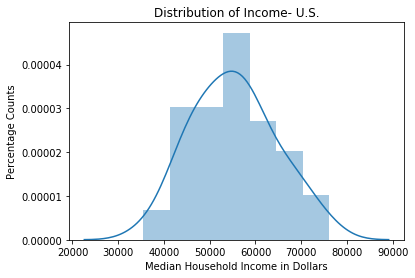

In [22]:
# What does income look like in the U.S.?
sns.distplot(df['median_household_income'])
plt.title('Distribution of Income- U.S.')
plt.xlabel('Median Household Income in Dollars')
plt.ylabel('Percentage Counts');

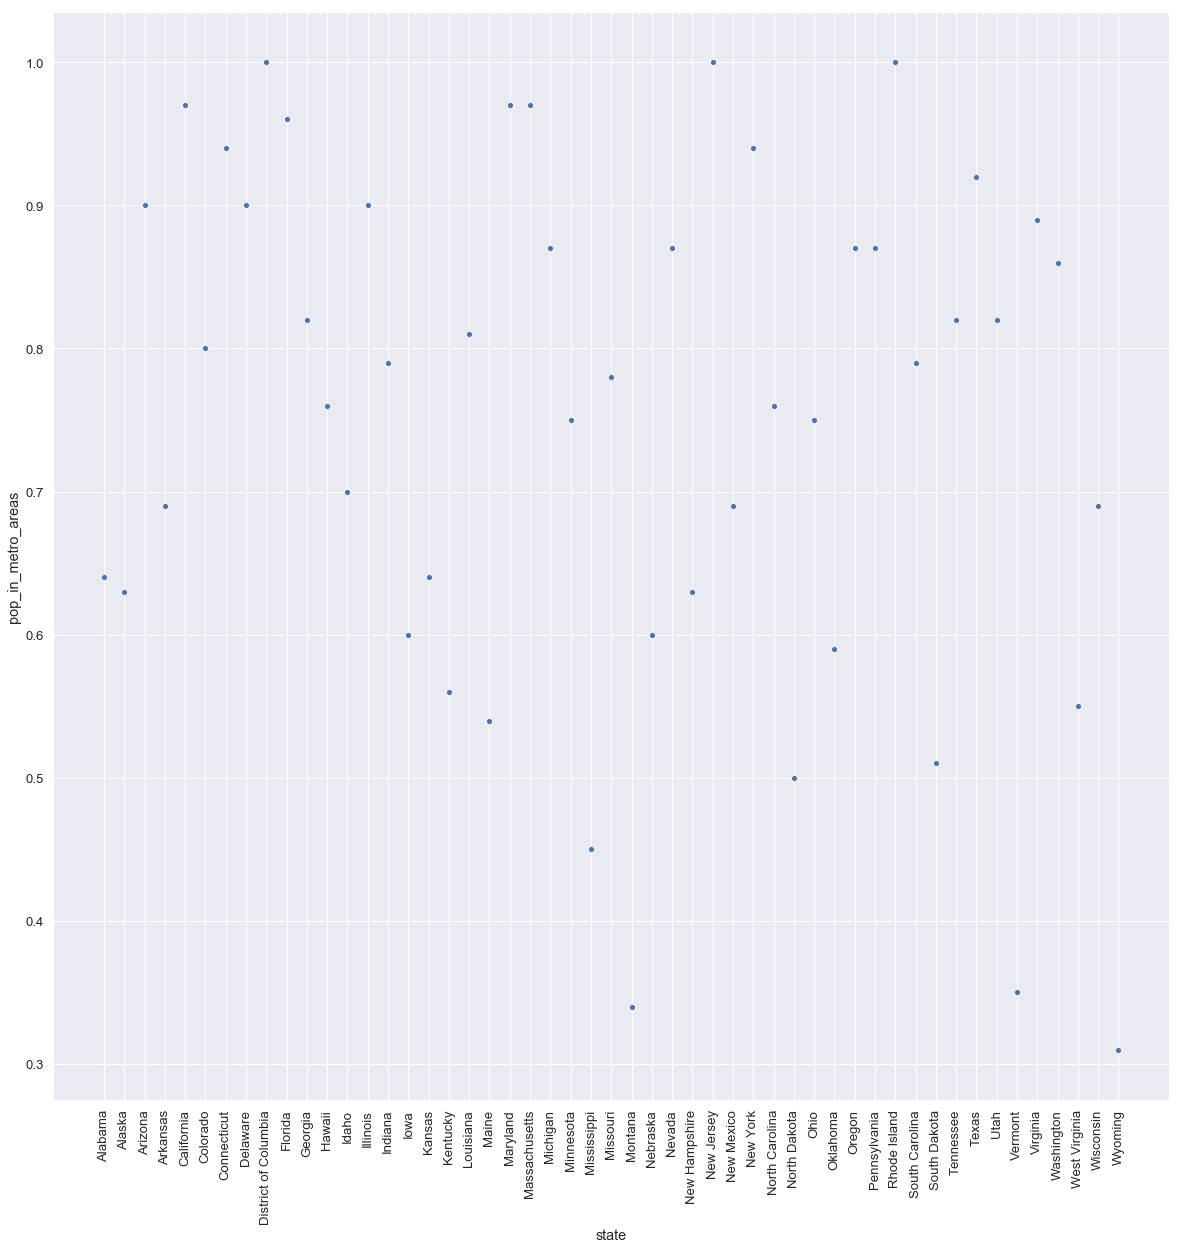

In [229]:
# What does the population in metro areas look like across the country?
plt.figure(figsize= (20, 20))
sns.scatterplot(x= df['state'], y= df['pop_in_metro_areas'], data= df, palette= 'bright')
plt.xticks(rotation = 90);

Wow, this is a mess! Let's break the states down into geographical regions as defined by the U.S. Census Bureau.

In [27]:
# Breaking our states down into divisions
divisions_dict = {
    'New England' : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', np.NaN, np.NaN, np.NaN]
    ,'Mid-Atlantic': ['New Jersey', 'New York', 'Pennsylvania', np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
    ,'East North Central': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', np.NaN, np.NaN, np.NaN, np.NaN]
    ,'West North Central': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', np.NaN, np.NaN]
    ,'South Atlantic': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia']
    ,'East South Central': ['Alabama', 'Kentucky', 'Mississippi','Tennessee', np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
    ,'West South Central': ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas', np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
    ,'Mountain': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', np.NaN]
    ,'Pacific': ['Alaska', 'California', 'Hawaii', 'Oregon','Washington', np.NaN, np.NaN, np.NaN, np.NaN] 
}

In [39]:
#Created a new dataframe for the divisions information
divisions_df = pd.DataFrame.from_dict(divisions_dict)
divisions_df = divisions_df.melt(var_name='division',value_name='state')
divisions_df.dropna(how='any',inplace=True)

In [40]:
#Sanity check- does my new dataframe look like I think it should?
divisions_df.head()

,division,state
0,New England,Connecticut
1,New England,Maine
2,New England,Massachusetts
3,New England,New Hampshire
4,New England,Rhode Island


In [41]:
#Let's also break the divisions into regions, as per U.S. Census Bureau
regions_dict= {
    'Northeast': ['New England', 'Mid-Atlantic', np.NaN]
    ,'Midwest': ['East North Central', 'West North Central', np.NaN]
    ,'South': ['South Atlantic', 'East South Central', 'West South Central']
    ,'West':['Mountain', 'Pacific', np.NaN]
}

In [42]:
#Created new dataframe for the regions information developed above.
regions_df = pd.DataFrame.from_dict(regions_dict)
regions_df = regions_df.melt(var_name='region',value_name='division')
regions_df.dropna(how='any',inplace=True)

In [43]:
#Sanity check- Does my new dataframe look like I expect it to look?
regions_df.head()

,region,division
0,Northeast,New England
1,Northeast,Mid-Atlantic
3,Midwest,East North Central
4,Midwest,West North Central
6,South,South Atlantic


In [44]:
#Step 1 of merging information from regions to divisions
divisions_df = pd.merge(regions_df, divisions_df, on='division', how='outer')

In [45]:
#Cleaned up the index after the merge so it doesn't effect the next step of the merge
divisions_df.reset_index()

,index,region,division,state
0,0,Northeast,New England,Connecticut
1,1,Northeast,New England,Maine
2,2,Northeast,New England,Massachusetts
3,3,Northeast,New England,New Hampshire
4,4,Northeast,New England,Rhode Island
5,5,Northeast,New England,Vermont
6,6,Northeast,Mid-Atlantic,New Jersey
7,7,Northeast,Mid-Atlantic,New York
8,8,Northeast,Mid-Atlantic,Pennsylvania
9,9,Midwest,East North Central,Illinois


In [46]:
#Step 2 of merge- add new divisions info from the new df to original df
df= df.merge(right=divisions_df,on='state',how='left')

In [47]:
# Sanity check to make sure that our dataframes merged correctlyb
df.head()

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,South,East South Central
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,West,Pacific
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,West,Mountain
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,South,West South Central
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,West,Pacific


Excellent! Now we can look at our variables in an even more in depth and easier to manage manner thanks to our divisions and regions!

''

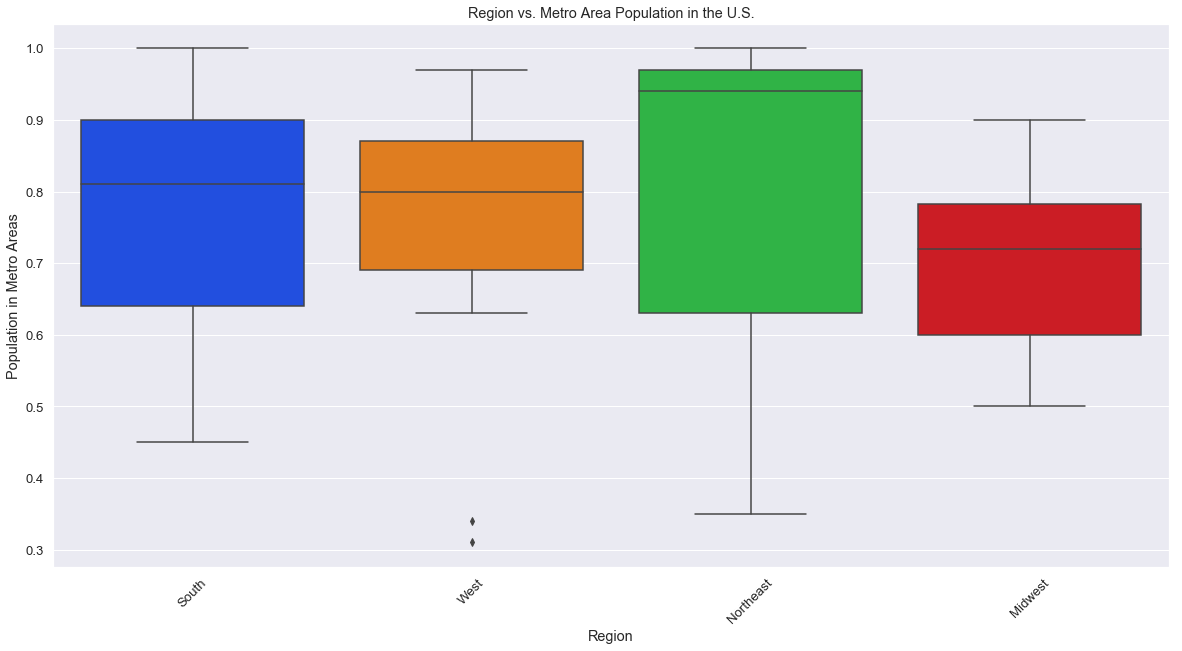

In [230]:
# What does metro population look like in each region?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['pop_in_metro_areas'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Region vs. Metro Area Population in the U.S.')
plt.xlabel('Region')
plt.ylabel('Population in Metro Areas')
;

**Takeaways:** 
- The Northeast region has the largest amount of population living in metro areas
- The West region has some weird outliers that we will be taking a closer look at
- The South region has quite a few areas with a high metro concentration 
- The Midwest is less metro areas and more rural

After looking at the metro population by region I want to know what each division looks like for metro populations!

In [56]:
# A quick reminder of what our divisions are!
df['division'].unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

''

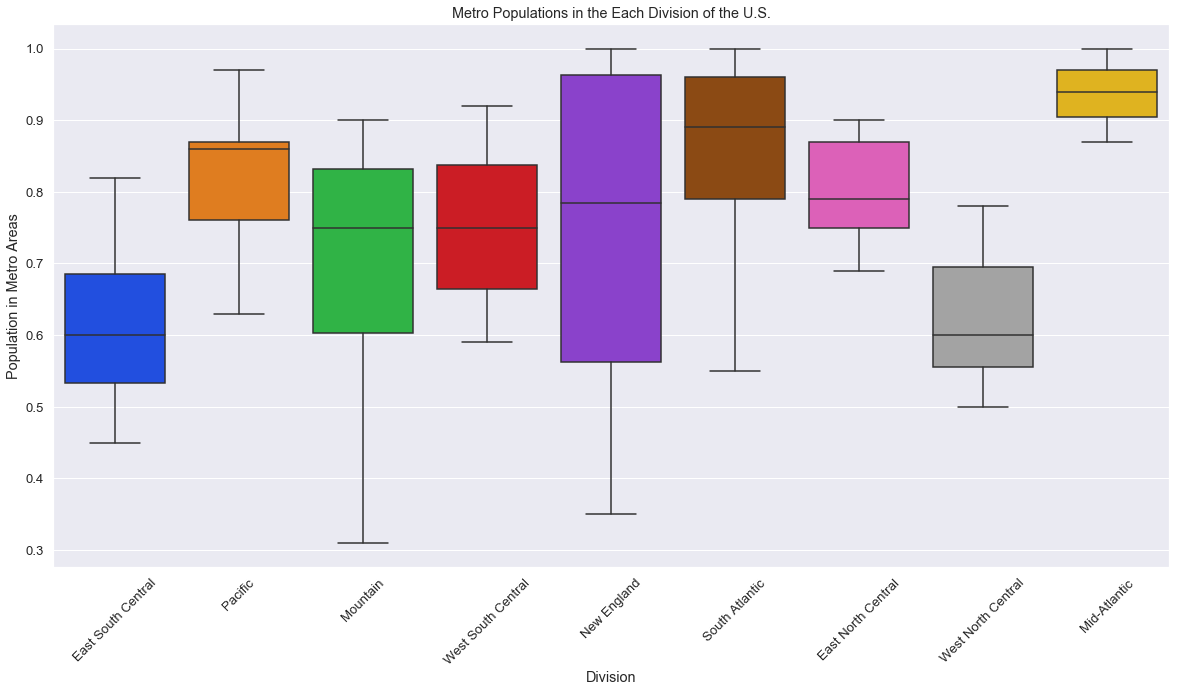

In [231]:
# What does metro population look like in each division?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['pop_in_metro_areas'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Metro Populations in the Each Division of the U.S.')
plt.xlabel('Division')
plt.ylabel('Population in Metro Areas')
;

**Takeaways:**
- New England has the largest populations in metro areas followed by South and Mid-Atlantic
- East South Central and West North Central have smaller metro populations
- The Mountain division has the largest spread of population

Let's go back and explore what is happening in the West region in a little more depth!

''

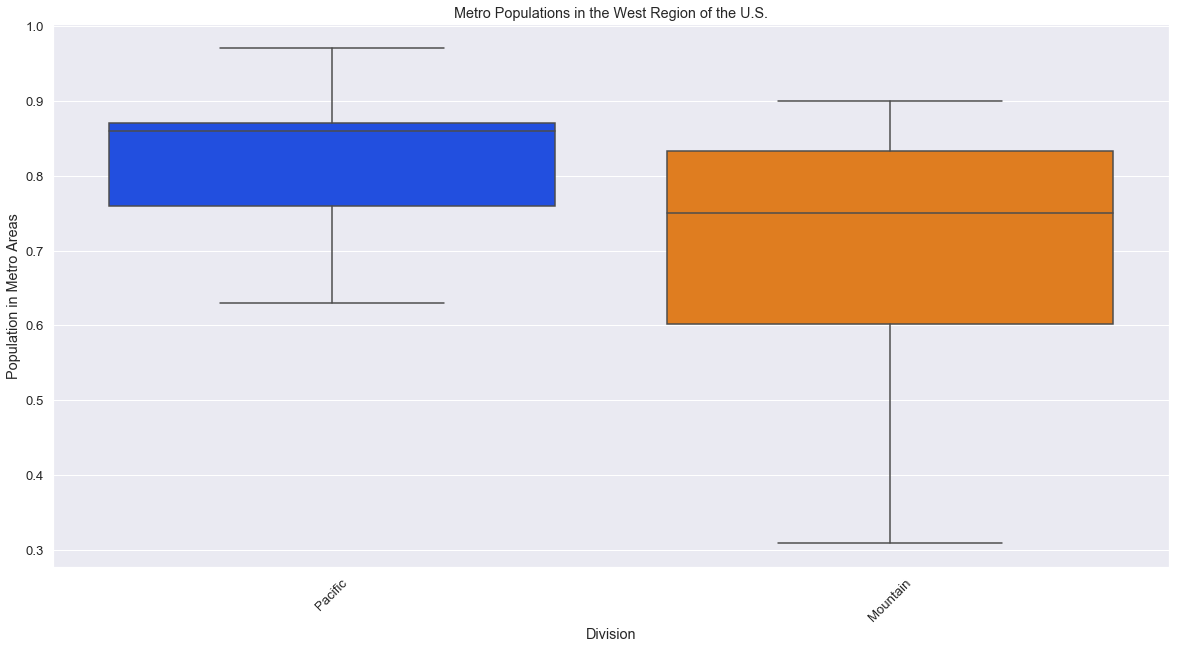

In [232]:
# Let's look at the West region's metro populations by division 
west_df= df.loc[df['region']== 'West']

plt.figure(figsize= (20, 10))
sns.boxplot(x= west_df['division'], y= df['pop_in_metro_areas'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Metro Populations in the West Region of the U.S.')
plt.xlabel('Division')
plt.ylabel('Population in Metro Areas')
;

**Takeaway:** The Mountain division of the West region has the most variance in it's population in metro areas, which, cognitively, makes sense!

Since we have now broken down the states into regions and divisions let's revisit median household incomes to see what we can learn!

''

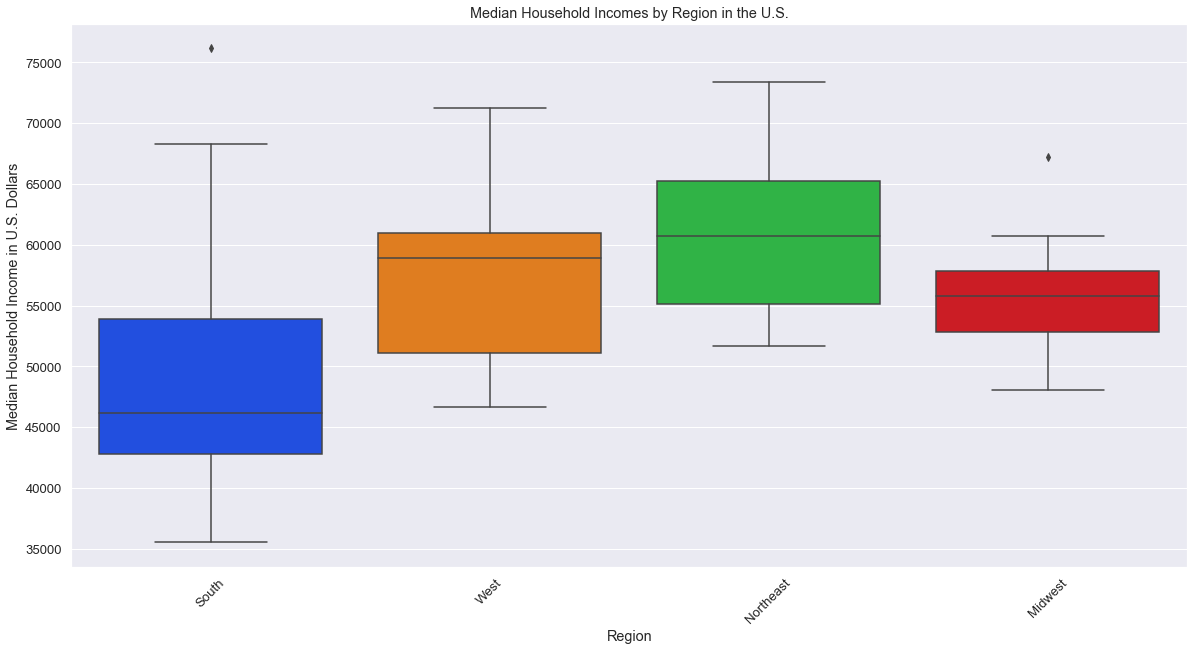

In [233]:
# Looking at median income brokendown by geographical region
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['median_household_income'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Median Household Incomes by Region in the U.S.')
plt.xlabel('Region')
plt.ylabel('Median Household Income in U.S. Dollars')
;

**Takeaways:**
-  The Northeast region has the highest median household incomes overall
- The West and Midwest regions have similar household income spreads
- The South region has the lowest median household incomes 

Looking at this information let's take a closer look at the South region and see what median household income looks like by division!

''

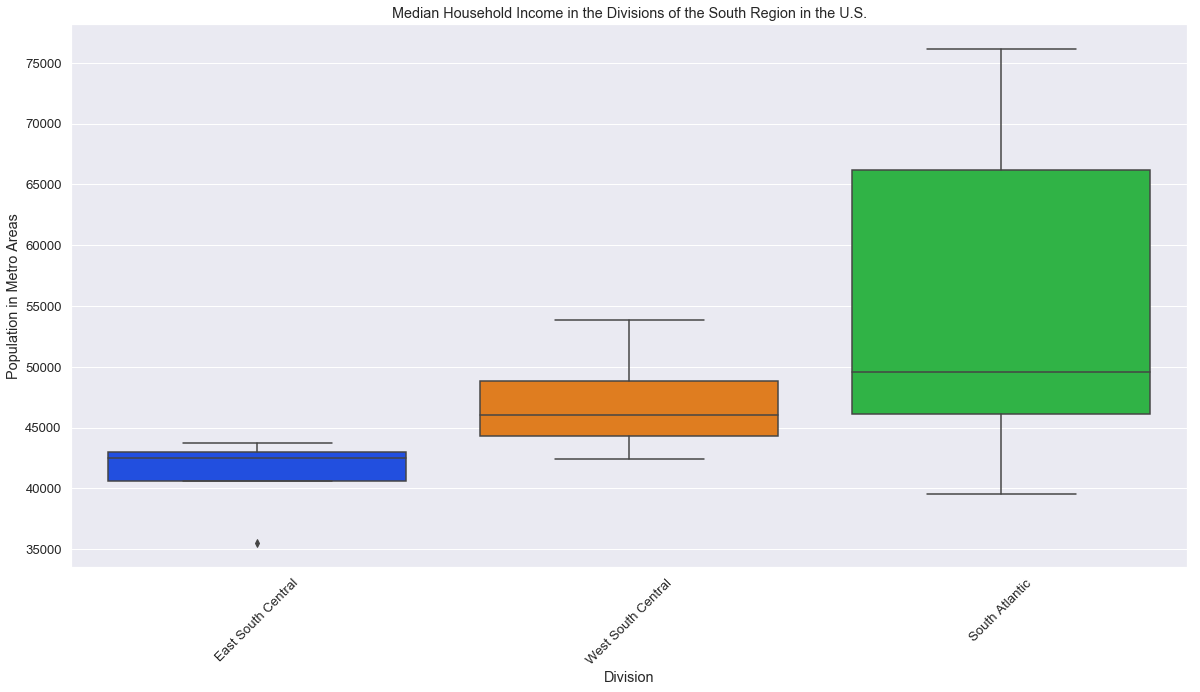

In [234]:
# Looking at median household income for divisions in the South region of the U.S.
south_df= df.loc[df['region']== "South"]

plt.figure(figsize= (20, 10))
sns.boxplot(x= south_df['division'], y= df['median_household_income'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Median Household Income in the Divisions of the South Region in the U.S.')
plt.xlabel('Division')
plt.ylabel('Population in Metro Areas')
;

**Takeaways:** The median household income in the South region is lowest in the East South Central Division followed pretty closely by the West South Central Region. 

In [68]:
# Memory refresher: Which states are in the East South Central division?
df.loc[df['division']== 'East South Central']

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,South,East South Central
17,Kentucky,42786,0.050,0.56,0.817,0.03,0.17,0.466,0.15,0.63,0.324397,4.207890,South,East South Central
24,Mississippi,35521,0.061,0.45,0.804,0.00,0.14,0.468,0.44,0.58,0.067447,0.622746,South,East South Central
42,Tennessee,43716,0.057,0.82,0.831,0.04,0.13,0.468,0.27,0.61,0.199938,3.136051,South,East South Central


**Takeaway**: The states with the lowest median household incomes are Alabama, Kentucky, Mississippi, and Tennessee.

''

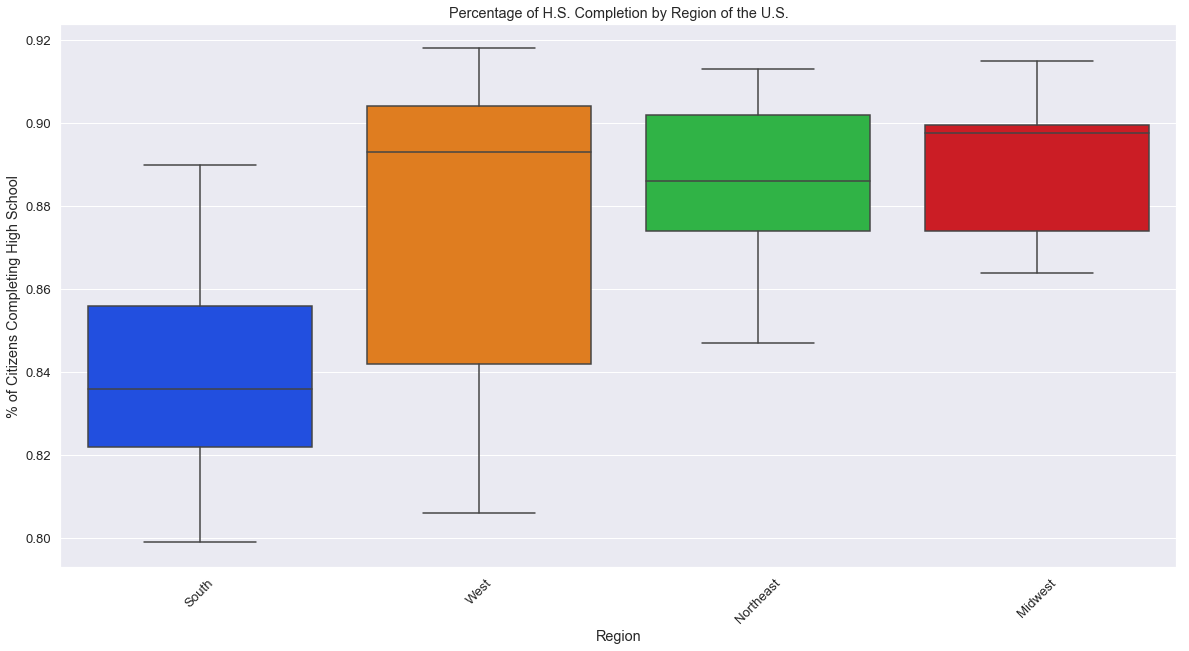

In [235]:
# What does education level (completion of high school) look like by region?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['pop_hs_degree'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of H.S. Completion by Region of the U.S.')
plt.xlabel('Region')
plt.ylabel('% of Citizens Completing High School')
;

**Takeaways:** Like with median household income we see that the South region also has the lowest number of high school graduates in their population. Let's look at the same information by division.

''

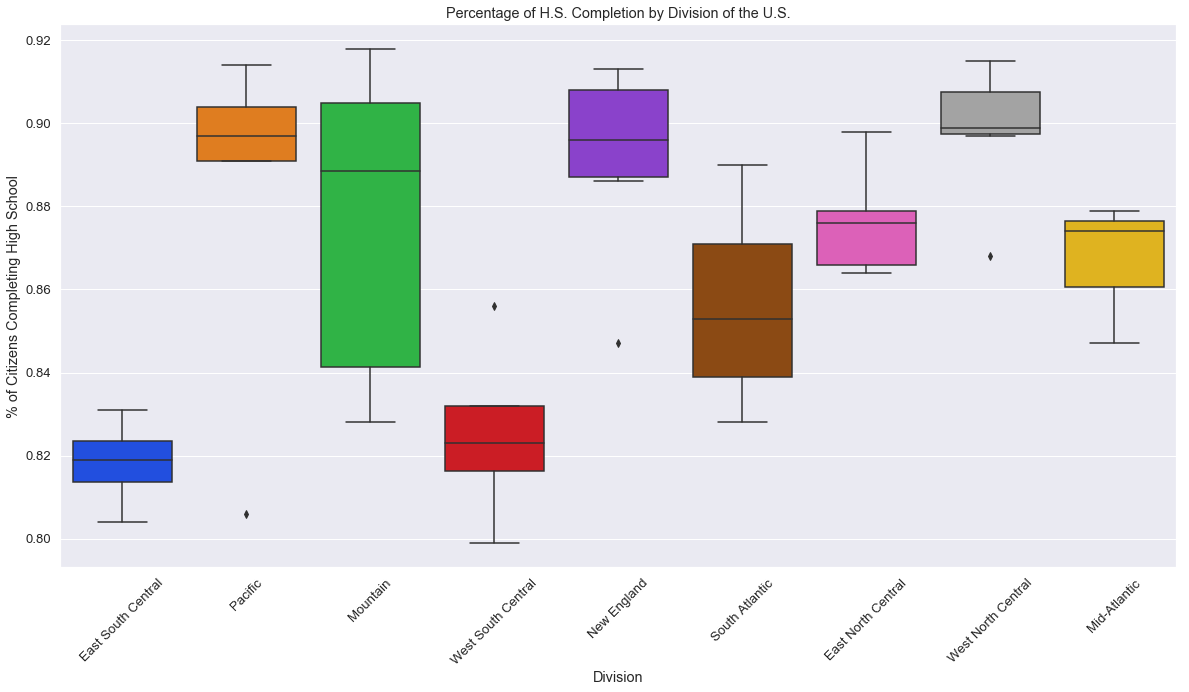

In [236]:
# Looking at high school completion by division
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['pop_hs_degree'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of H.S. Completion by Division of the U.S.')
plt.xlabel('Division')
plt.ylabel('% of Citizens Completing High School')
;

**Takeaways:** Again, the East South Central Division has the lowest number of high school graduates followed closely by the West South Central Division. Let's take a closer look at this variable on the state level for the East South Central Division.

''

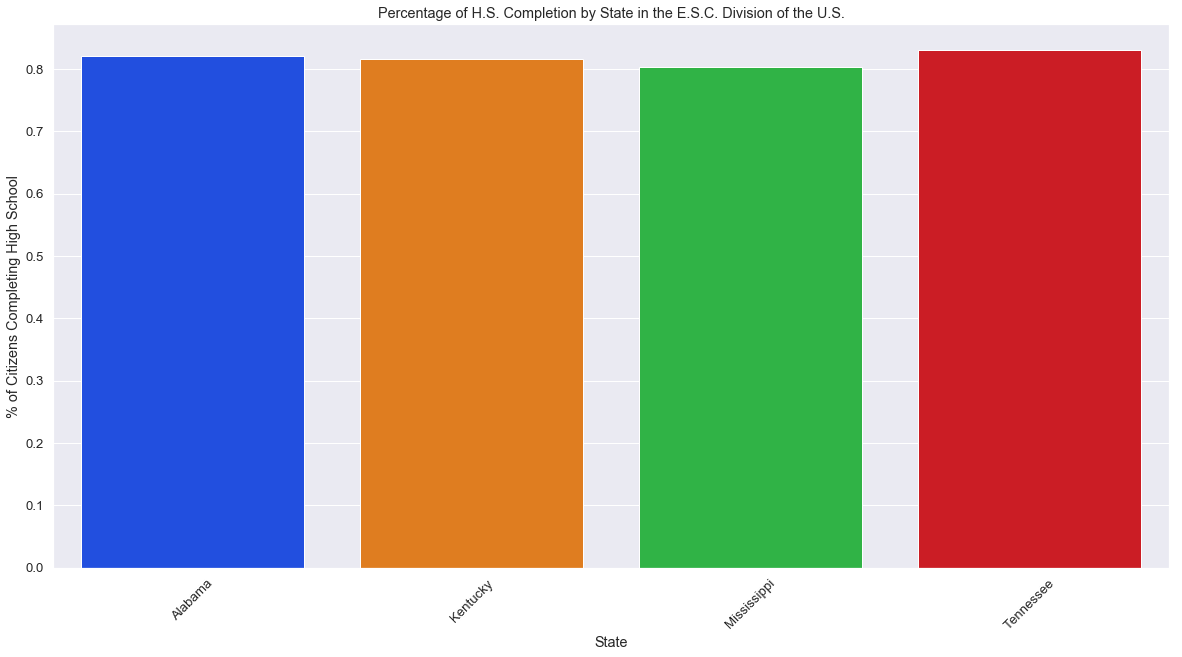

In [237]:
eastsc_df= df.loc[df['division']== 'East South Central']

# Breaking high school graduation down by the state level in the East South Central Division
plt.figure(figsize= (20, 10))
sns.barplot(x= eastsc_df['state'], y= df['pop_hs_degree'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of H.S. Completion by State in the E.S.C. Division of the U.S.')
plt.xlabel('State')
plt.ylabel('% of Citizens Completing High School')
;

**Takeaways:** Of the four states in the East South Central Division of the U.S. Misissippi is the lowest in the percentage of high school graduates in its population (around 80%)

Now that we have a slightly better understanding of the metro populations, median household incomes, and percentge of residents with high school diplomas, let's look more at racial and citizenship related variables!

''

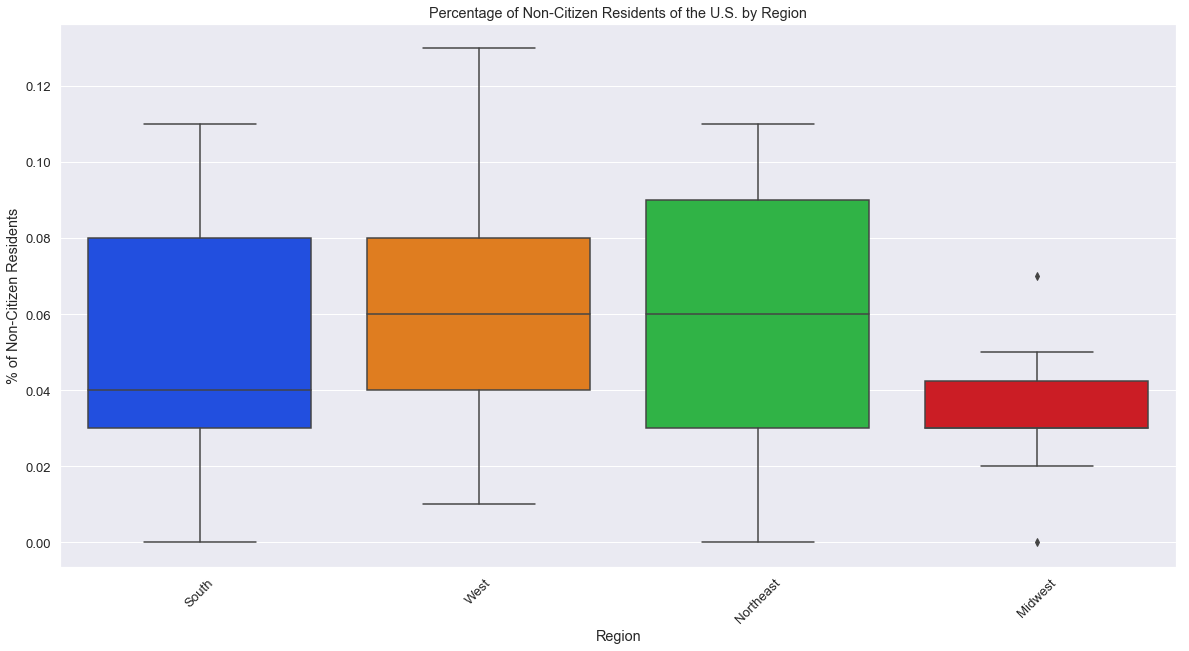

In [238]:
# What does percentage of non-citizens look like in each region?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['%_noncitizen'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Non-Citizen Residents of the U.S. by Region')
plt.xlabel('Region')
plt.ylabel('% of Non-Citizen Residents')
;

''

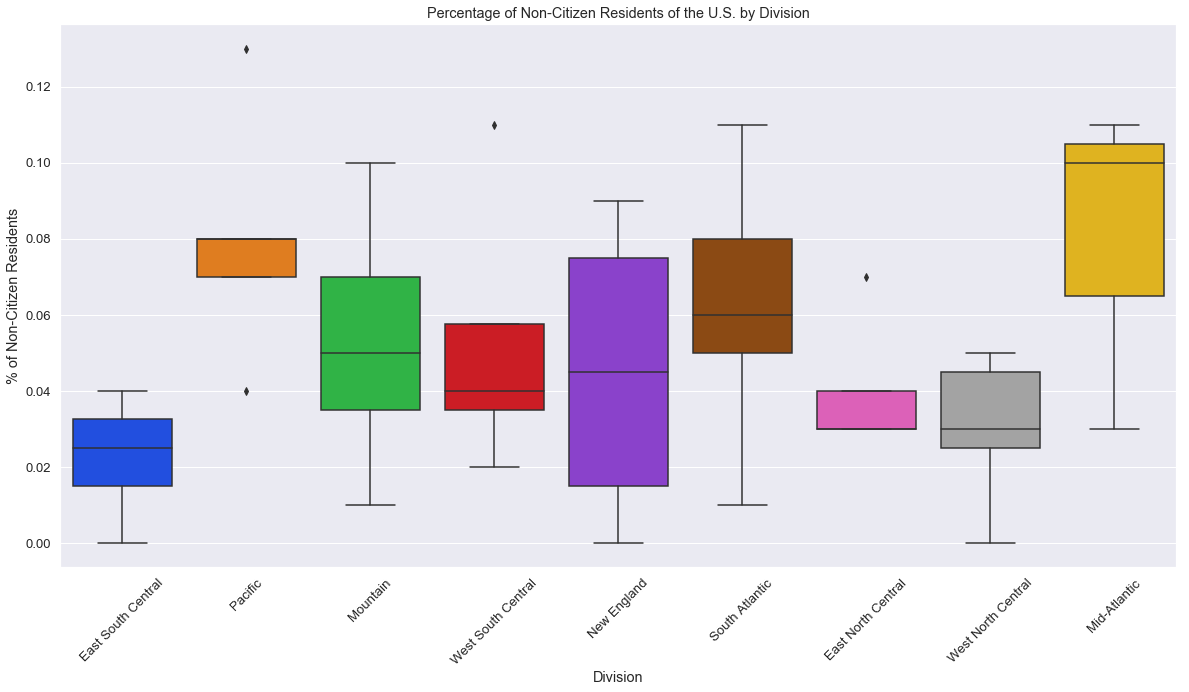

In [239]:
# What does the percentage of non-citizen residents look like in each division?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['%_noncitizen'], data= df, palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Non-Citizen Residents of the U.S. by Division')
plt.xlabel('Division')
plt.ylabel('% of Non-Citizen Residents')
;

**Takeaways:** The Mid-Atlantic Division has the largest number of non-citizen residents. This is interesting, so let's take a closer look at this in at the state level.

''

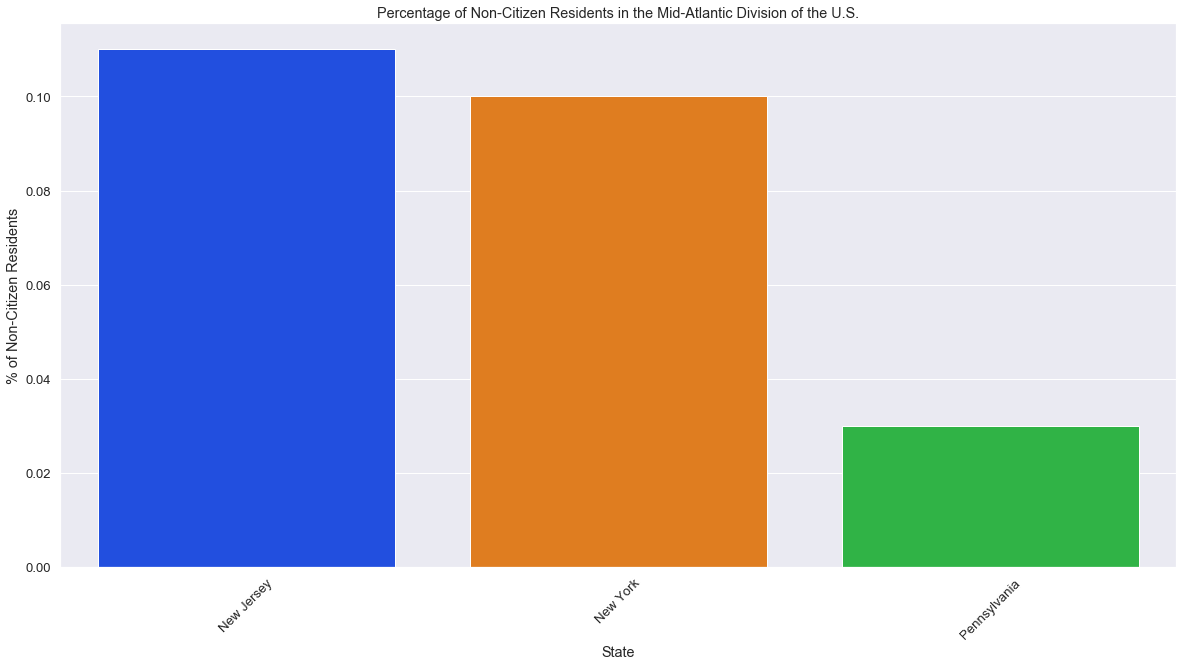

In [240]:
# Creating a sub-dataframe for the Mid-Atlantic Division
midatlantic_df= df.loc[df['division']== "Mid-Atlantic"]

# Visualizing what percentages of non-citizen residents look like by state in this region
plt.figure(figsize= (20, 10))
sns.barplot(x= midatlantic_df['state'], y= df['%_noncitizen'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Non-Citizen Residents in the Mid-Atlantic Division of the U.S.')
plt.xlabel('State')
plt.ylabel('% of Non-Citizen Residents')
;

**Takeaways:** New Jersey (greater than 10%) and New York (around 10%) have the largest population of non-citizen residents in the United States. This makes sense as there is a large population of immigrants in both states.

''

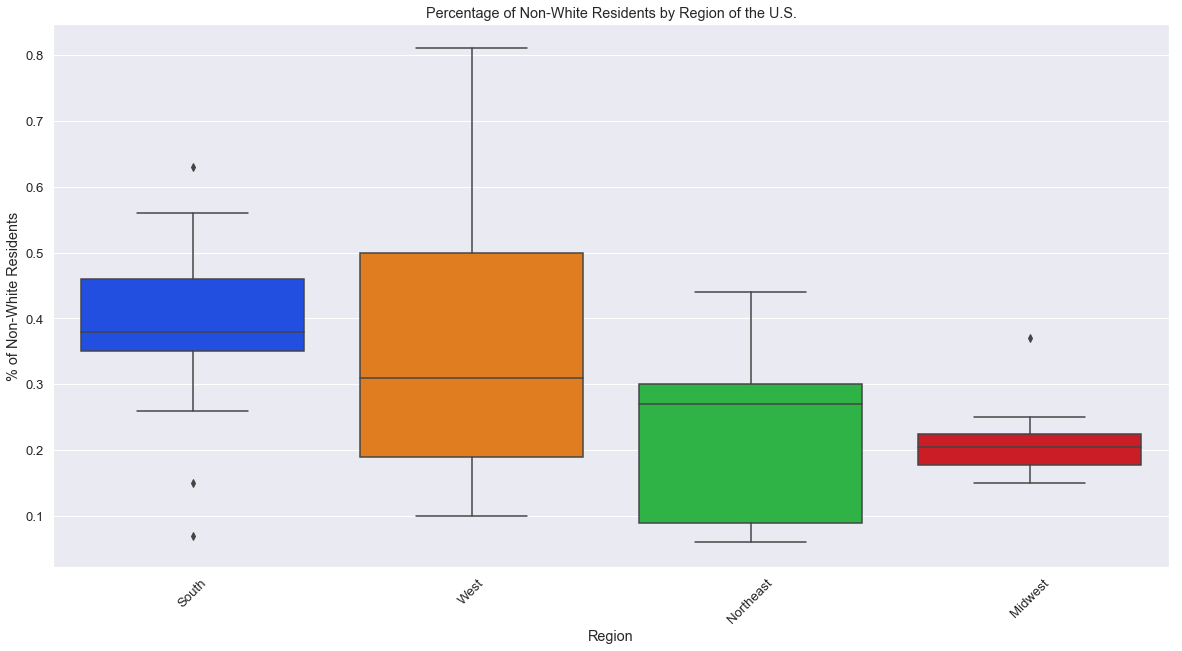

In [241]:
# What does percentage of non-white residents look like in each region?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['%_nonwhite'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Non-White Residents by Region of the U.S.')
plt.xlabel('Region')
plt.ylabel('% of Non-White Residents')
;

''

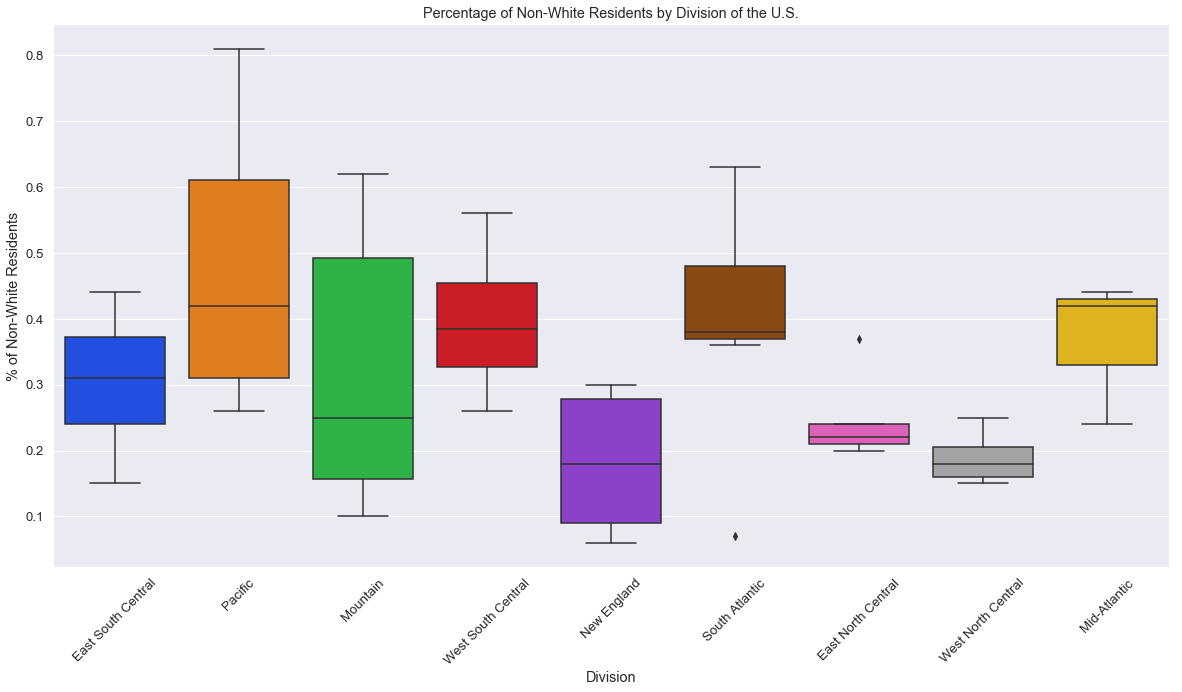

In [242]:
# What does percentage of non-white residents look like in each division?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['%_nonwhite'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Non-White Residents by Division of the U.S.')
plt.xlabel('Division')
plt.ylabel('% of Non-White Residents')
;

**Takeaways:**
- The Pacific Division of the U.S. has the largest percentage of non-white residents
- The Mountain and West South Central Divisions have the second and third largest percentages of non-white residents, respectively
- East North Central and West North Central Divisions have the smallest percentages of non-white residents.

Now that we have a slightly better idea of distribution of residents relating to citizenship and race, let's look at the amount of white residents in poverty. (**NOTE:** At the time this data was published (2015) families of four were considered below the poverty level in the United States if their median household income was $24,000 or below.) 

''

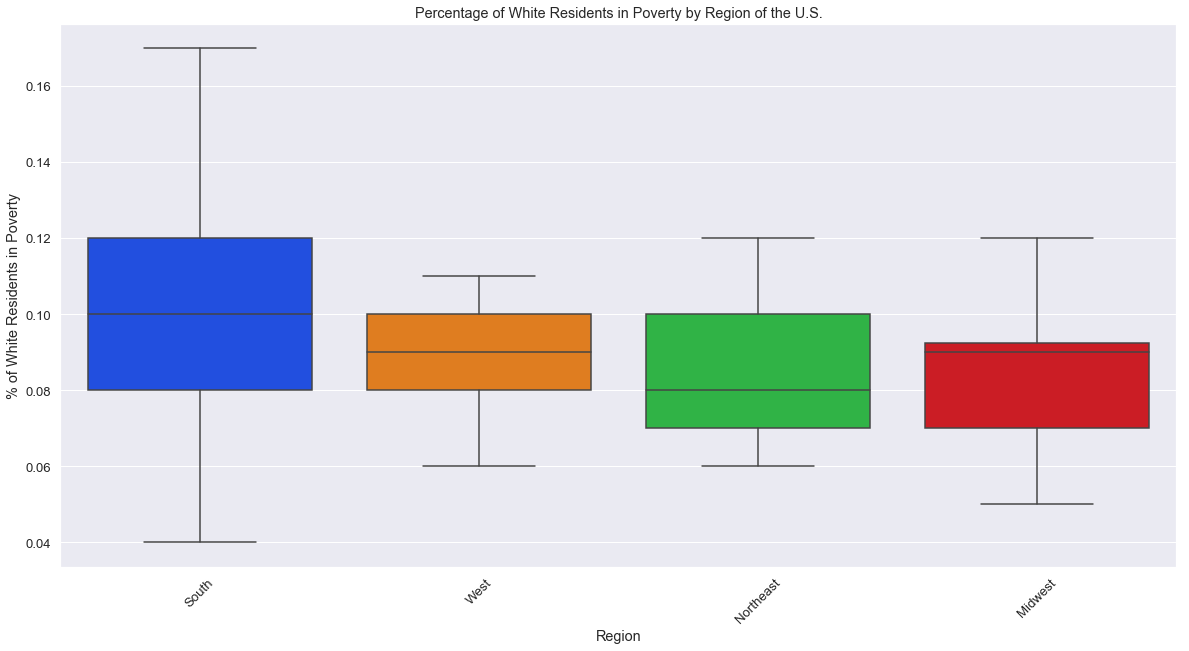

In [243]:
# What does the percentage of white residents living in poverty look like?

plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['%_white_poverty'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of White Residents in Poverty by Region of the U.S.')
plt.xlabel('Region')
plt.ylabel('% of White Residents in Poverty')
;

''

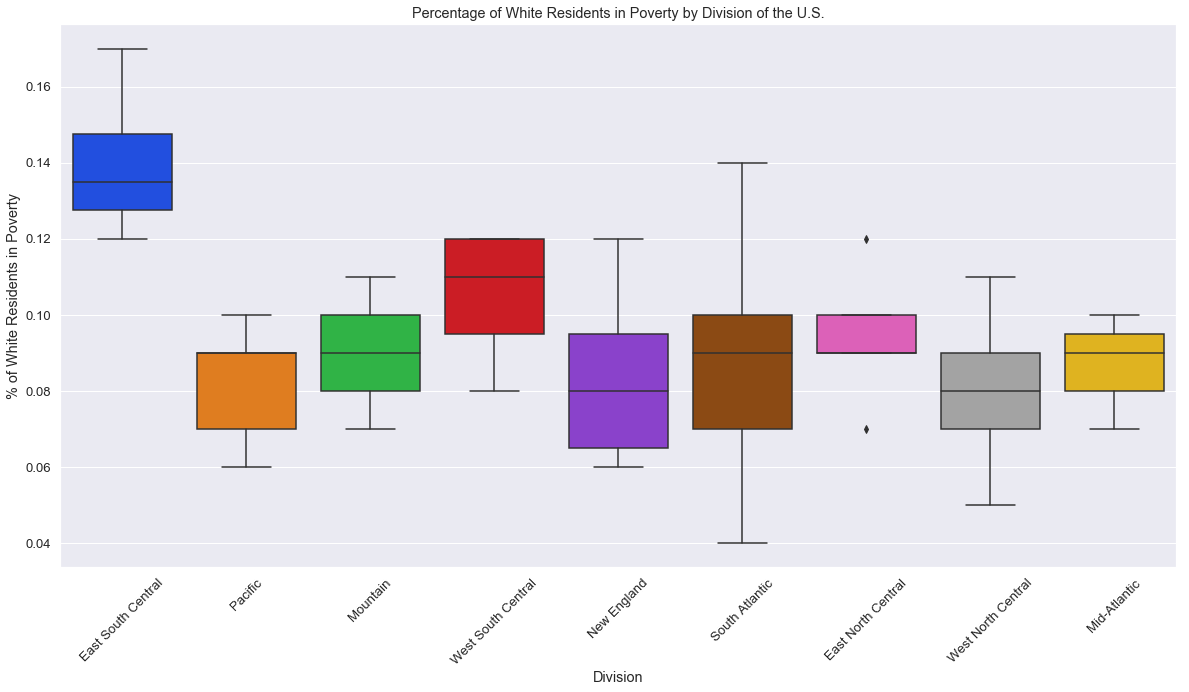

In [244]:
# What does white poverty look like by division in the United States?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['%_white_poverty'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of White Residents in Poverty by Division of the U.S.')
plt.xlabel('Division')
plt.ylabel('% of White Residents in Poverty')
;

**Takeaways:** As before the East South Central Division stands out with as almost an outlier with the highest percentages of white poverty out of any region. Let's take a closer look at this variable on the state level.

''

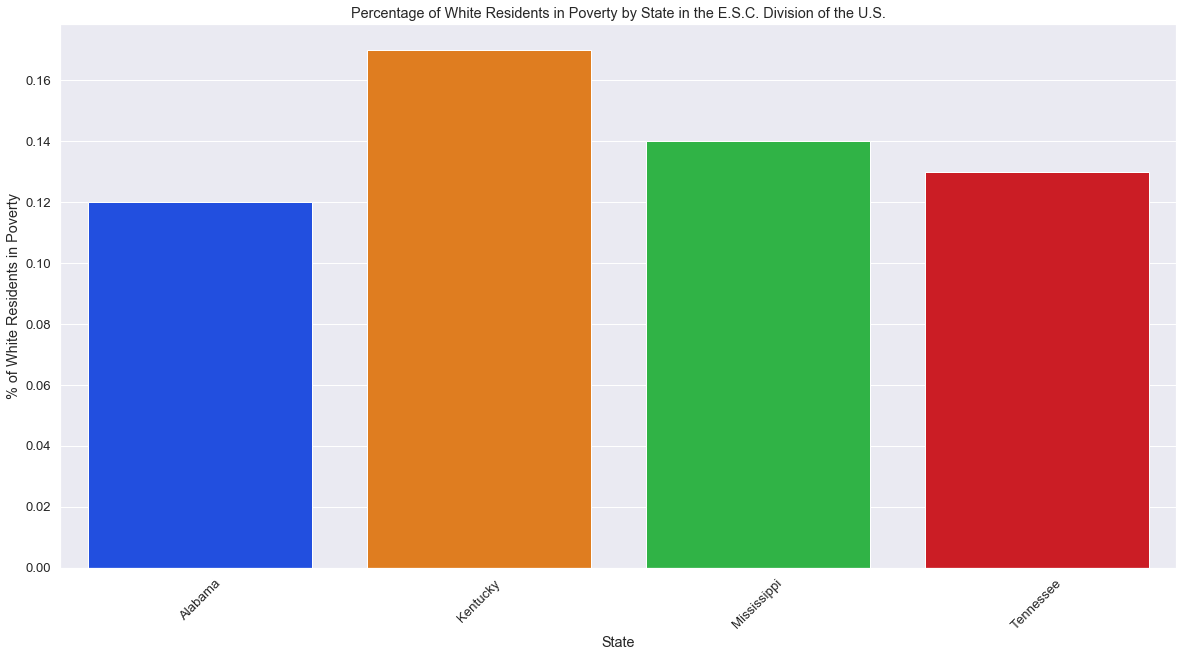

In [245]:
# What does white poverty look like by state in the East South Central Division?
plt.figure(figsize= (20, 10))
sns.barplot(x= eastsc_df['state'], y= df['%_white_poverty'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of White Residents in Poverty by State in the E.S.C. Division of the U.S.')
plt.xlabel('State')
plt.ylabel('% of White Residents in Poverty')
;

**Takeaways:** Kentucky leads the states with the highest percentage of white residents in poverty (greater than 16%) followed by Mississippi (14%) and Tennessee (around 13%).

Out of our remaining features to look at distribution of we seem to have three categories: economic inequity, Trump supporters, and the actual distribution of hate crimes. Let's take a look at all three.

Our first category to look at is economic inequity as measured by the Gini Index. The scale for these scores ranges from 0 (perfect economic equality) to 1 (perfect economic inequality). Geographical areas with scores closer to 1 have larger divisions between economic classes while those closer to 0 have smaller divisions in income.

''

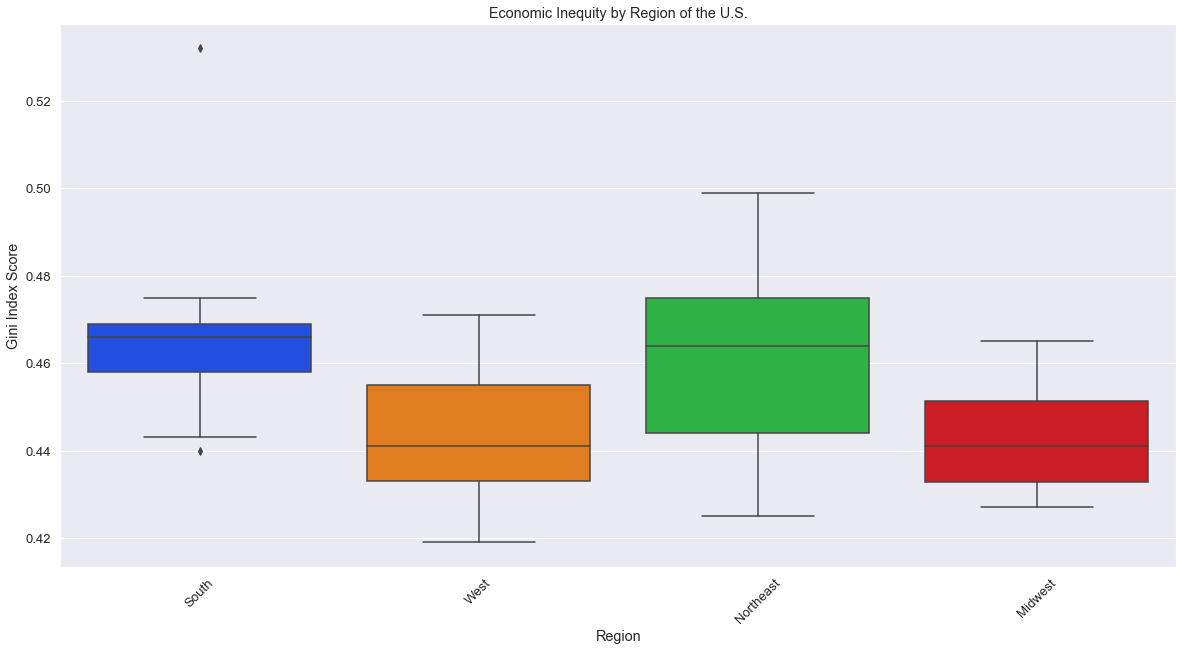

In [246]:
# What does economic inequity look like by region in the United States?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['gini_index'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Economic Inequity by Region of the U.S.')
plt.xlabel('Region')
plt.ylabel('Gini Index Score')
;

''

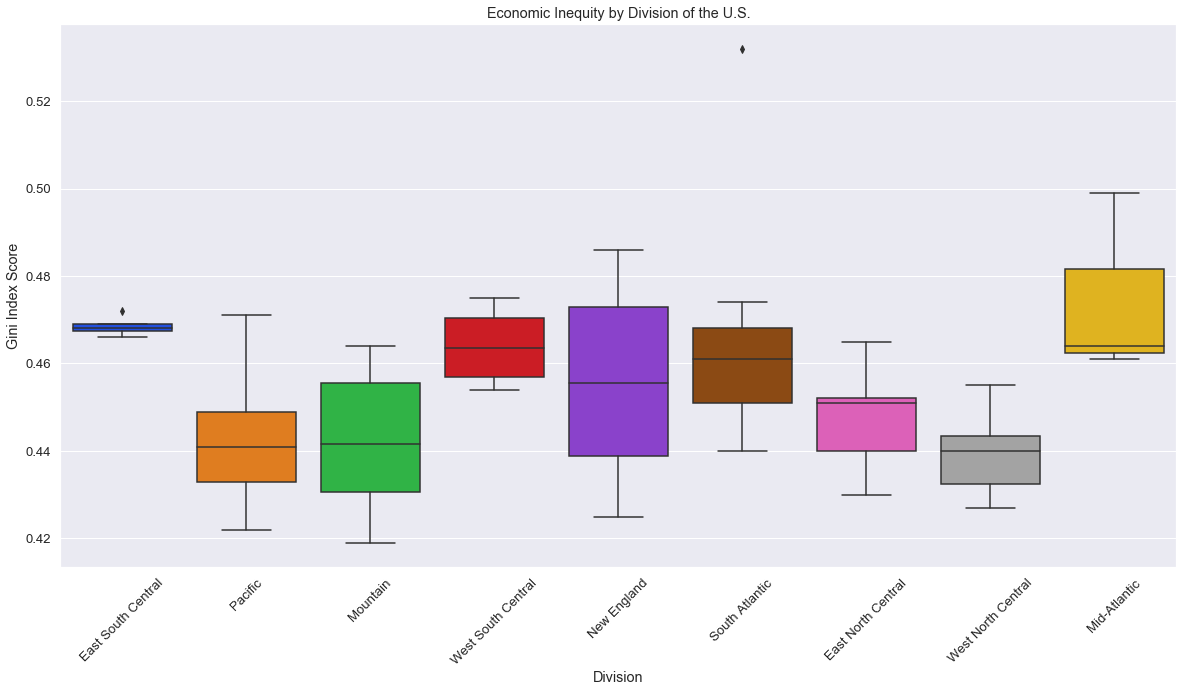

In [247]:
# What does economic inequity look like by division in the United States?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['gini_index'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Economic Inequity by Division of the U.S.')
plt.xlabel('Division')
plt.ylabel('Gini Index Score')
;

**Takeaways:** The Mid-Atlanic Division has the largest amount of ecomonic inequality of all divisions while the East South Central Division has the most unique distribution that is unlike any other division.

Next, let's look at the distribution of Trump supporters by region and division before diving into the hate crime reports.

''

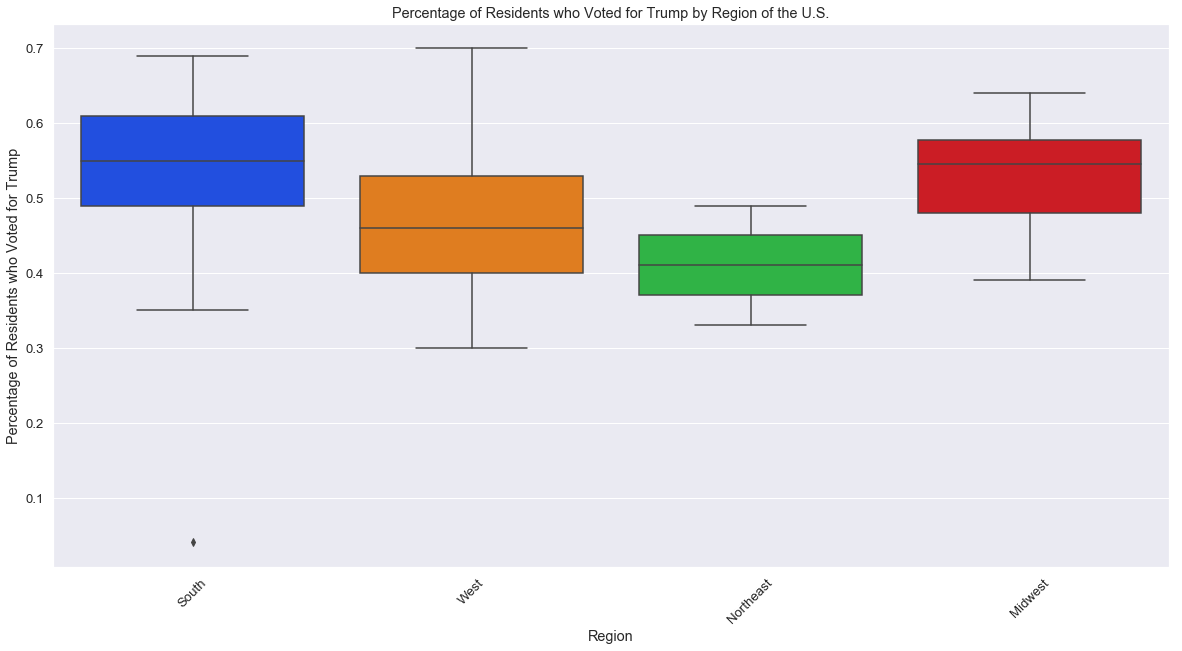

In [248]:
# What does percentage of residents who voted for Trump look like by region?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['%_voters_trump'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Residents who Voted for Trump by Region of the U.S.')
plt.xlabel('Region')
plt.ylabel('Percentage of Residents who Voted for Trump')
;

''

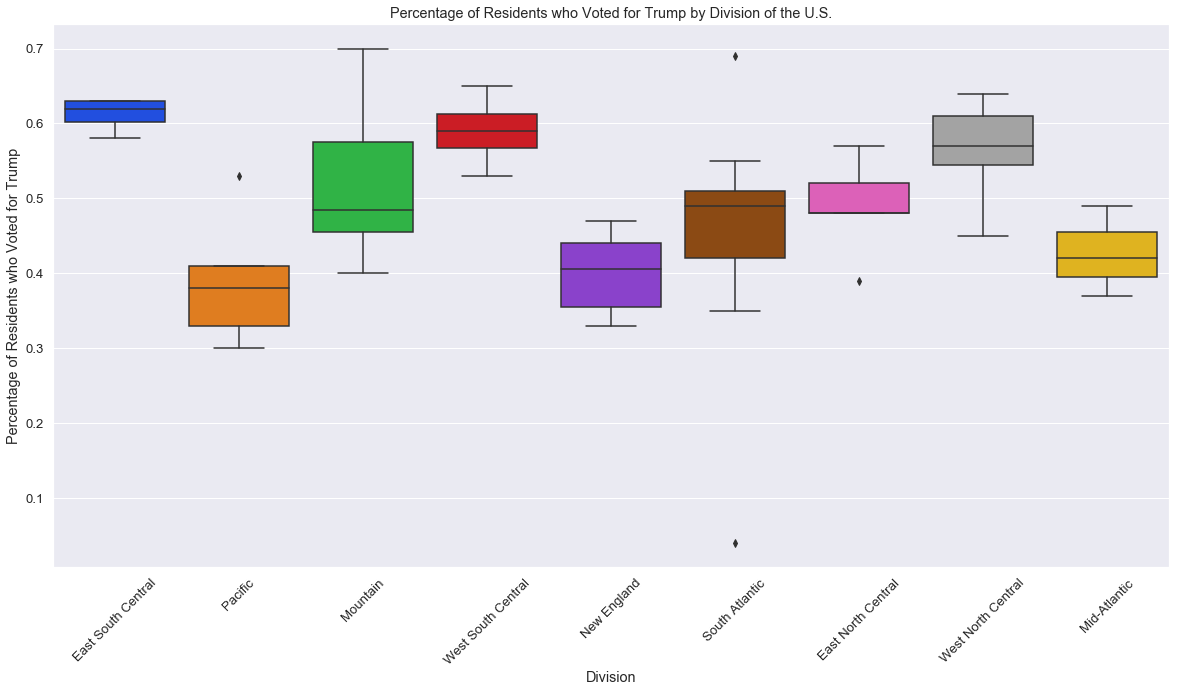

In [249]:
# What does percentage of residents who voted for Trump look like by division?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['%_voters_trump'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Residents who Voted for Trump by Division of the U.S.')
plt.xlabel('Division')
plt.ylabel('Percentage of Residents who Voted for Trump')
;

**Takeaways:**
- The largest percentages of residents who voted for Trump can be found in the East South Central Division
- The Pacific and New England Divisions had the lowest number of residents who voted for Trump

Last, but not least, let's look at the distribution of hate crimes by region and division, as recorded by the Southern Poverty Law Center.

''

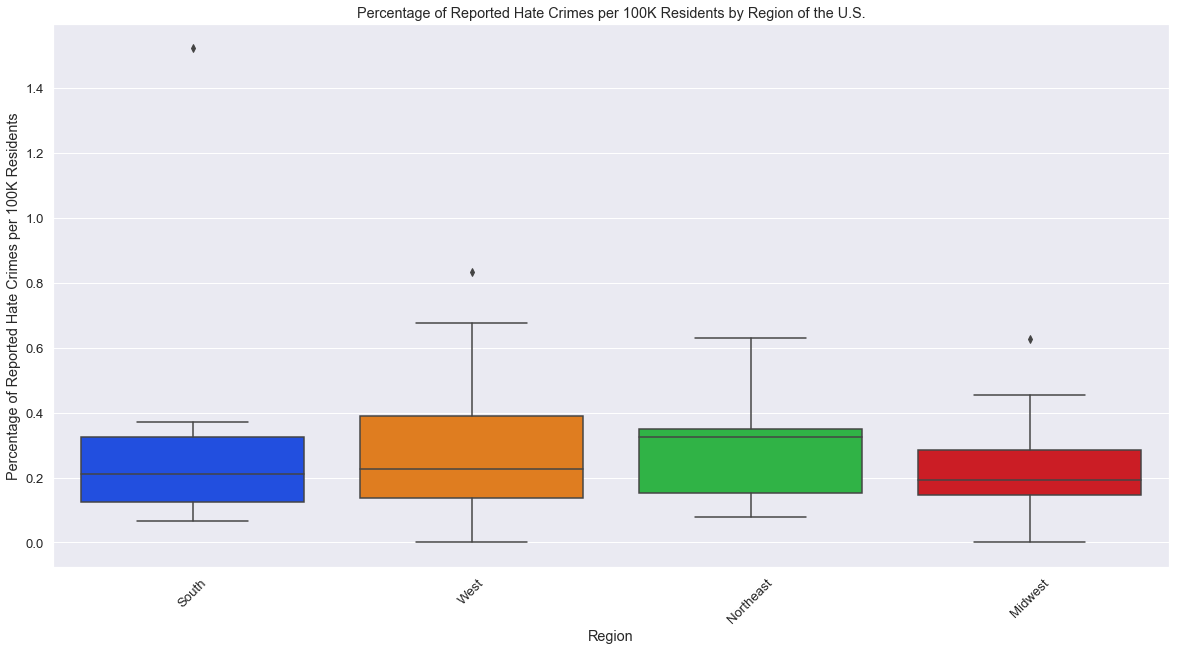

In [250]:
# What do hate crimes look like by region?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['region'], y= df['hc_per_100K_splc'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Reported Hate Crimes per 100K Residents by Region of the U.S.')
plt.xlabel('Region')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

''

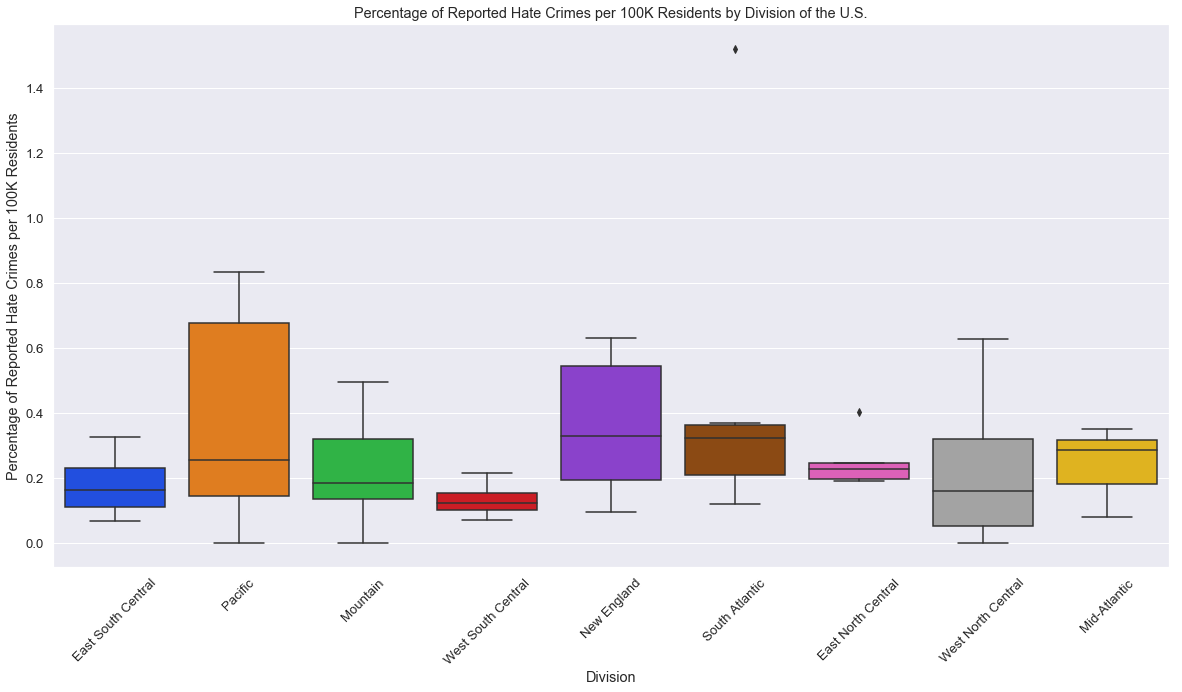

In [251]:
# What do hate crimes look like by division?
plt.figure(figsize= (20, 10))
sns.boxplot(x= df['division'], y= df['hc_per_100K_splc'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Reported Hate Crimes per 100K Residents by Division of the U.S.')
plt.xlabel('Division')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

**Takeaways:**
The distribution of this data is interesting. We see several odd outliers (South Region, South Atlantic Division, and East North Central Division) that we are going to look at in more detail.

''

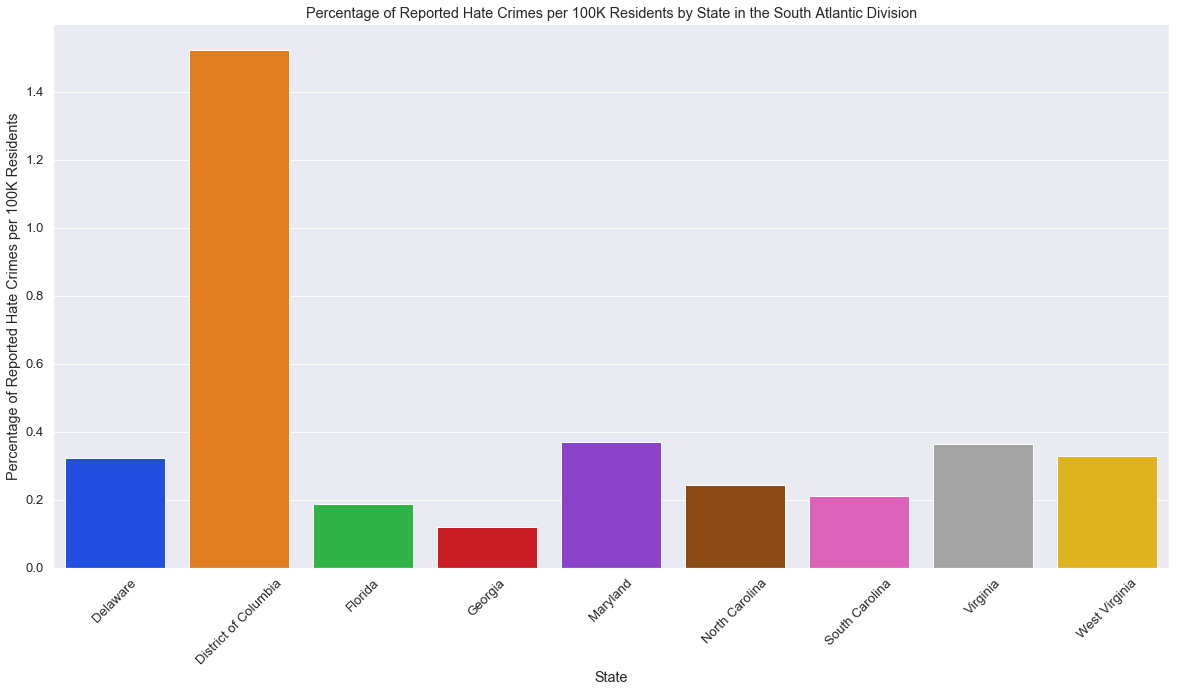

In [252]:
# Let's look at the South Atlantic Division to see what's up with those outliers
sar_df= df.loc[df['division']== 'South Atlantic']

plt.figure(figsize= (20, 10))
sns.barplot(x= sar_df['state'], y= df['hc_per_100K_splc'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Reported Hate Crimes per 100K Residents by State in the South Atlantic Division')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

''

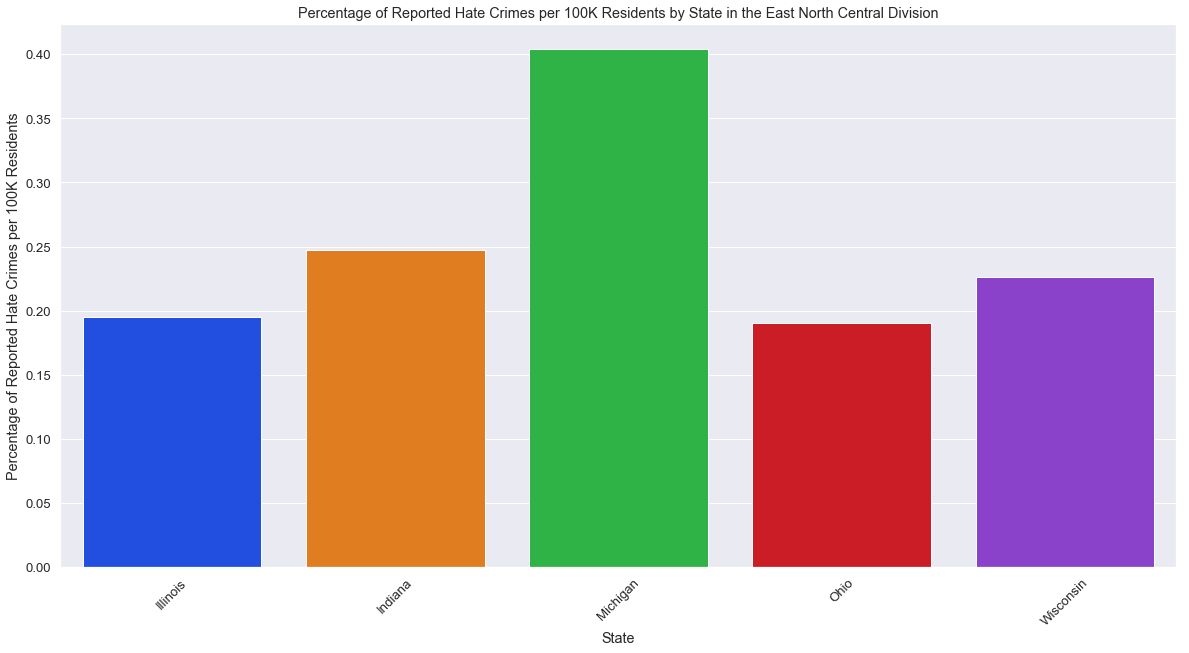

In [253]:
# Let's look at the East North Central Division to see what's up with those outliers
enc_df= df.loc[df['division']== 'East North Central']

plt.figure(figsize= (20, 10))
sns.barplot(x= enc_df['state'], y= df['hc_per_100K_splc'], data= df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Reported Hate Crimes per 100K Residents by State in the East North Central Division')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

**Takeaways:** The District of Columbia and Michigan both are obvious outliers for their respective divisions in regards to reported hate crime cases per 100k residents.

**After completing my intitial data analysis I was left with the following questions:**

1. Which states have the highest number of hate crimes?
2. Are income level and incidence of hate crimes related?
3. Are the number of Trump supporters and incidences of hate crimes connected?
4. What do states that have a high number of Trump supporters look like?
5. How does amount of rural to metropolitan areas in a state effect incidence of hate crimes, if at all?

### 2.2a: Question 1: Which states have the highest incidence of hate crimes (per 100k residents)?
[Return to Outline](#Project-Outline)

In [104]:
# Creating a new dataframe for states with the top 10 highest amounts of hate crimes
fbi_top_10= df.sort_values(by='avg_hc_per_100K_fbi', ascending= False).head(10)
fbi_top_10

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480,South,South Atlantic
21,Massachusetts,63151,0.046,0.97,0.890,0.09,0.08,0.475,0.27,0.34,0.630811,4.801899,Northeast,New England
34,North Dakota,60730,0.028,0.50,0.901,0.03,0.09,0.433,0.15,0.64,0.000000,4.741070,Midwest,West North Central
30,New Jersey,65243,0.056,1.00,0.874,0.11,0.07,0.464,0.44,0.42,0.078306,4.413203,Northeast,Mid-Atlantic
17,Kentucky,42786,0.050,0.56,0.817,0.03,0.17,0.466,0.15,0.63,0.324397,4.207890,South,East South Central
47,Washington,59068,0.052,0.86,0.897,0.08,0.09,0.441,0.31,0.38,0.677488,3.817740,West,Pacific
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701,Northeast,New England
23,Minnesota,67244,0.038,0.75,0.915,0.05,0.05,0.440,0.18,0.45,0.627480,3.612412,Midwest,West North Central
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,West,Mountain
37,Oregon,58875,0.062,0.87,0.891,0.07,0.10,0.449,0.26,0.41,0.832850,3.394886,West,Pacific


In [150]:
# Resetting font size to make the following visualizations easier to read
sns.set(font_scale=1)

<Figure size 1440x720 with 0 Axes>

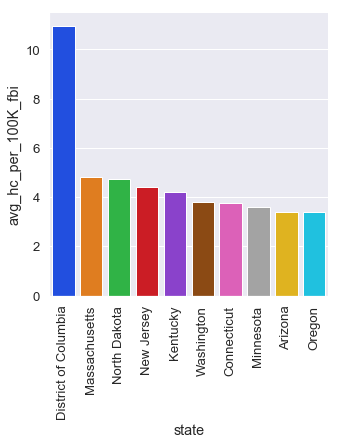

In [254]:
# Let's visualize what the FBI reported hate crimes look like
plt.figure(figsize= (20,10))
sns.catplot(x='state', y='avg_hc_per_100K_fbi', kind= 'bar',  data= fbi_top_10, palette ='bright')
plt.xticks(rotation=90);

In [152]:
# Are the top 10 locations the same as reported by the Southern Poverty Law Center?
splc_top10_df=  df.sort_values(by='hc_per_100K_splc', ascending= False).head(10)
splc_top10_df

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480,South,South Atlantic
37,Oregon,58875,0.062,0.87,0.891,0.07,0.10,0.449,0.26,0.41,0.832850,3.394886,West,Pacific
47,Washington,59068,0.052,0.86,0.897,0.08,0.09,0.441,0.31,0.38,0.677488,3.817740,West,Pacific
21,Massachusetts,63151,0.046,0.97,0.890,0.09,0.08,0.475,0.27,0.34,0.630811,4.801899,Northeast,New England
23,Minnesota,67244,0.038,0.75,0.915,0.05,0.05,0.440,0.18,0.45,0.627480,3.612412,Midwest,West North Central
19,Maine,51710,0.044,0.54,0.902,0.00,0.12,0.437,0.09,0.45,0.615574,2.626611,Northeast,New England
26,Montana,51102,0.041,0.34,0.908,0.01,0.10,0.435,0.10,0.57,0.495491,2.954959,West,Mountain
15,Iowa,57810,0.036,0.60,0.914,0.03,0.09,0.427,0.15,0.52,0.454427,0.561396,Midwest,West North Central
22,Michigan,52005,0.050,0.87,0.879,0.04,0.09,0.451,0.24,0.48,0.403779,3.200442,Midwest,East North Central
5,Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.390523,2.804689,West,Mountain


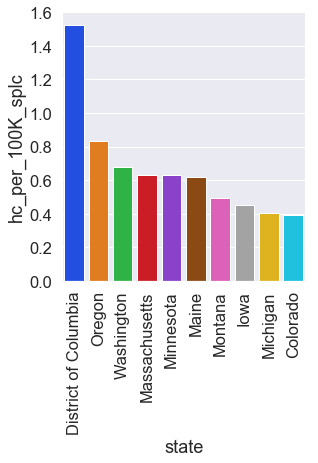

In [111]:
# Let's visualize what the SPLC reported hate crimes look like
sns.catplot(x='state', y='hc_per_100K_splc', kind= 'bar',  data= splc_top10_df, palette ='bright')
plt.xticks(rotation=90);

Since both features that record the number of hate crimes have different orders for their top ten we will look at the five overlapping states below.

**Top 5 Highest Incidents of Hate Crimes (per 100k residents)**
1. District of Columbia (FBI:11, SPLC: 1.5)
2. Massachusetts (FBI: 5, SPLC: 0.6)
3. Oregon (FBI: 5, SPLC: 0.8)
4. Minnesota (FBI: 3.5, SPLC: 0.6)
5. Washington (FBI: 4, SPLC: 0.6)

**Follow up question: What factors do the top five locations for hate crimes have in common? Is there some sort of overlying trend to help us predict who might have more hate crimes?**

In [273]:
# Creating a subset of the dataframe for the top 5 locations for hate crimes
top_5_df= df.loc[df['state'].isin(['District of Columbia', 'Massachusetts', 'Oregon', 'Minnesota', 'Washington'])]
top_5_df

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division,hc_mean
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480,South,South Atlantic,6.237891
21,Massachusetts,63151,0.046,0.97,0.890,0.09,0.08,0.475,0.27,0.34,0.630811,4.801899,Northeast,New England,2.716355
23,Minnesota,67244,0.038,0.75,0.915,0.05,0.05,0.440,0.18,0.45,0.627480,3.612412,Midwest,West North Central,2.119946
37,Oregon,58875,0.062,0.87,0.891,0.07,0.10,0.449,0.26,0.41,0.832850,3.394886,West,Pacific,2.113868
47,Washington,59068,0.052,0.86,0.897,0.08,0.09,0.441,0.31,0.38,0.677488,3.817740,West,Pacific,2.247614


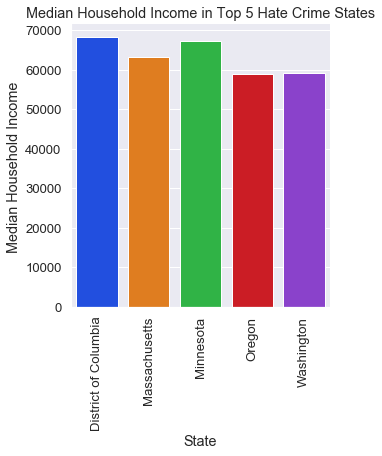

In [274]:
# What does median household income look like in our top 5?
sns.catplot(x='state', y='median_household_income', kind= 'bar',  data= top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Median Household Income in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('Median Household Income ');

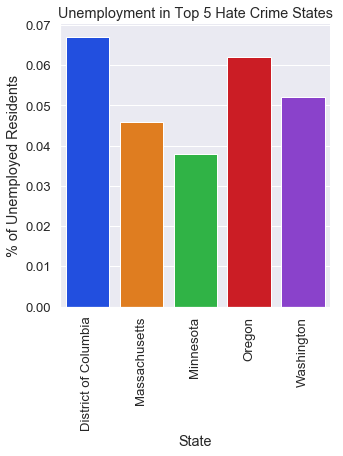

In [260]:
# What does unemployment look like in our top 5?
sns.catplot(x='state', y='unemployed_seasonal', kind= 'bar',  data= top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Unemployment in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('% of Unemployed Residents');

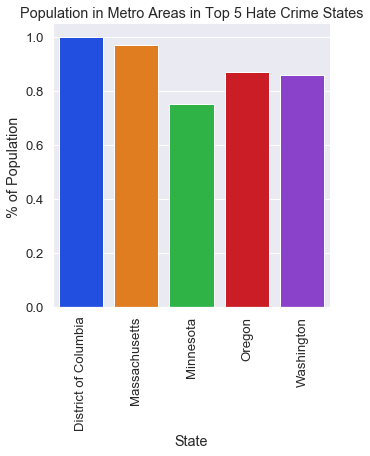

In [261]:
# What does population in metro areas look like in our top 5?
sns.catplot(x='state', y='pop_in_metro_areas', kind='bar', data=top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Population in Metro Areas in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('% of Population ');

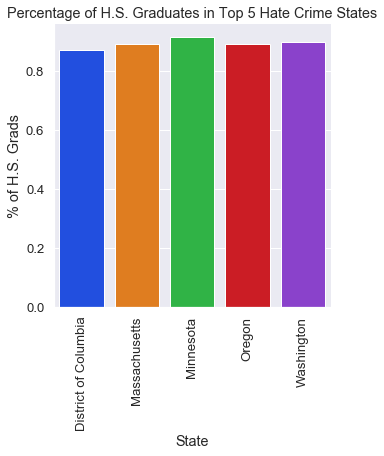

In [262]:
# What does the percentage of population with a high school degree look like in our top 5?
sns.catplot(x='state', y='pop_hs_degree', kind='bar', data=top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Percentage of H.S. Graduates in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('% of H.S. Grads');

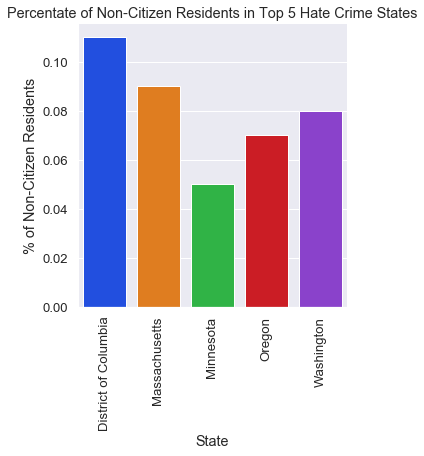

In [263]:
# What does the percentage of non-citizens look like in our top 5?
sns.catplot(x='state', y='%_noncitizen', kind='bar', data=top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Percentate of Non-Citizen Residents in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('% of Non-Citizen Residents');

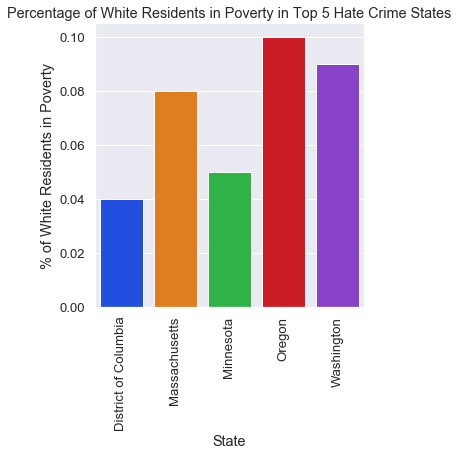

In [264]:
# What does white poverty look like in our top 5?
sns.catplot(x='state', y='%_white_poverty', kind='bar', data=top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Percentage of White Residents in Poverty in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('% of White Residents in Poverty');

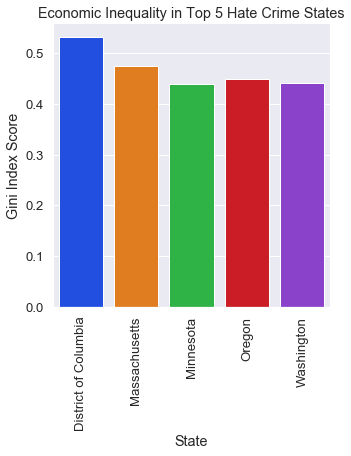

In [265]:
# What does economic inequity look like in our top 5?
sns.catplot(x='state', y='gini_index', kind='bar', data=top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Economic Inequality in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('Gini Index Score');

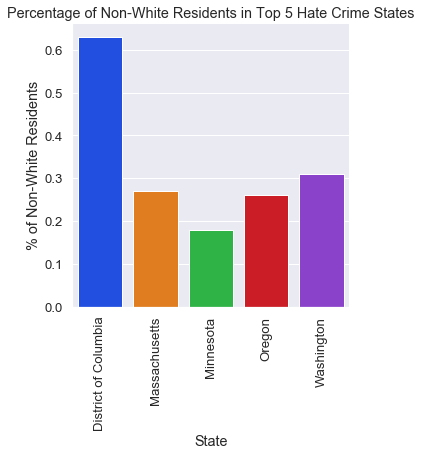

In [266]:
# What does the percentage of non-white residents look like in our top 5?
sns.catplot(x='state', y='%_nonwhite', kind='bar', data=top_5_df, palette='bright')
plt.xticks(rotation=90)
plt.title('Percentage of Non-White Residents in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('% of Non-White Residents');

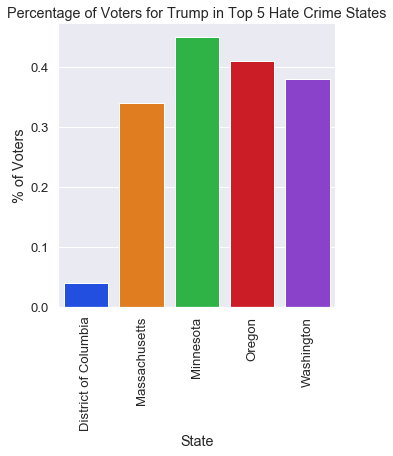

In [267]:
# What does the number of people who voted for Trump look like in our top 5?
sns.catplot(x='state', y='%_voters_trump', kind='bar', data=top_5_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Percentage of Voters for Trump in Top 5 Hate Crime States')
plt.xlabel('State')
plt.ylabel('% of Voters');

**Interesting takeaways from basic comparisons above:**
1. All of the states in our top five have median household incomes of above %55,000 USD.
2. Three of the states have high rates of unemployment(DC: 6.5%, Oregon: 6%, Washington: 5%) while the other two are lower
3. All of the top five states have a metro population of above 75% (Minnesota has the lowest at around 75%)
4. All of the top five states have at least 80% of all residents 25 and older having earned high school diplomas
5. Three of the five states have a high population of non-citizen residents (DC: 10%, Massachusetts: 9%, and Washington: 8%) while the other two have relatively low percentages of non-citizen residents Oregon: 7%, Minnesota: 5%)
6. Three states have higher percentages of poverty in white residents (Oregon: 10%, Washington: 9% and Massachusetts: 8%) while the other two states are 5% or below for white poverty
7. All of the top five states have a Gini Index score of 0.45 or higher meaning that they are closer to being economically unbalanced rather than economically equitable.
8. One state stood out with the percentage of non-white residents (DC: 60%) while the remaing four states were between 15 -30% non-white residents.
9. Four of the five states had between 35- 45% of the voting population vote for Trump while D.C. less than 5% of voting residents voting for Trump


### 2.2b: Question 2: Are hate crimes and income level related?
[Return to Outline](#Project-Outline)

Since we looked into what median household income looks like for the top five states for reported hate crimes let's look at the general population and see if we can see any connections between income and hate crimes.

In [166]:
# What does the distribution of median household income look like? We can use this to create data subsets.
df['median_household_income'].describe()

count       51.000000
mean     55223.607843
std       9208.478170
min      35521.000000
25%      48657.000000
50%      54916.000000
75%      60719.000000
max      76165.000000
Name: median_household_income, dtype: float64

**Takeaway:** The top 75% of states in the U.S. have median household incomes of $60,000 and up while the bottom 25% have incomes of $49,000 and below. Let's look at these two subgroups to see what their incidences of hate crimes look like.

In [178]:
# Creating a subset of top 75% income states
top75income_df= df.loc[df['median_household_income']> 60000]
top75income_df

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,West,Pacific
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,West,Pacific
5,Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.390523,2.804689,West,Mountain
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701,Northeast,New England
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480,South,South Atlantic
11,Hawaii,71223,0.034,0.76,0.904,0.08,0.07,0.433,0.81,0.30,0.000000,0.000000,West,Pacific
20,Maryland,76165,0.051,0.97,0.890,0.08,0.06,0.443,0.50,0.35,0.370439,1.324840,South,South Atlantic
21,Massachusetts,63151,0.046,0.97,0.890,0.09,0.08,0.475,0.27,0.34,0.630811,4.801899,Northeast,New England
23,Minnesota,67244,0.038,0.75,0.915,0.05,0.05,0.440,0.18,0.45,0.627480,3.612412,Midwest,West North Central
29,New Hampshire,73397,0.034,0.63,0.913,0.03,0.06,0.425,0.09,0.47,0.151550,2.105989,Northeast,New England


In [169]:
# Creating a subset of the bottom 25% states for income
bottom25income_df= df.loc[df['median_household_income']< 49000]
bottom25income_df

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,South,East South Central
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,South,West South Central
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521,0.698070,South,South Atlantic
14,Indiana,48060,0.044,0.79,0.866,0.03,0.12,0.440,0.20,0.57,0.247009,1.757357,Midwest,East North Central
17,Kentucky,42786,0.050,0.56,0.817,0.03,0.17,0.466,0.15,0.63,0.324397,4.207890,South,East South Central
18,Louisiana,42406,0.060,0.81,0.822,0.02,0.12,0.475,0.42,0.58,0.109733,1.341170,South,West South Central
24,Mississippi,35521,0.061,0.45,0.804,0.00,0.14,0.468,0.44,0.58,0.067447,0.622746,South,East South Central
31,New Mexico,46686,0.068,0.69,0.828,0.06,0.10,0.464,0.62,0.40,0.294811,1.886435,West,Mountain
33,North Carolina,46784,0.058,0.76,0.843,0.05,0.10,0.464,0.38,0.51,0.244007,1.262680,South,South Atlantic
36,Oklahoma,47199,0.044,0.59,0.856,0.04,0.10,0.454,0.35,0.65,0.133629,1.081672,South,West South Central


Now that we have these subsets of data let's look at what the incidences of hate crimes look like here.

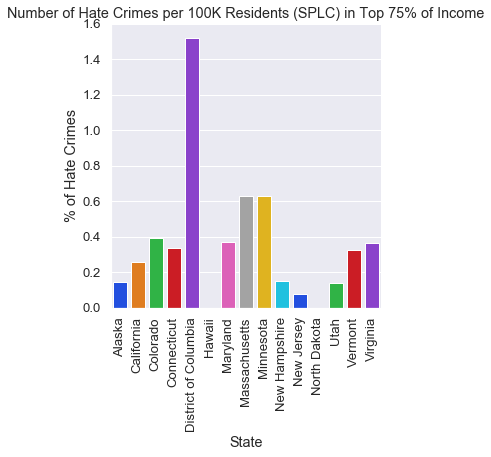

In [268]:
# Number of hate crimes per 100k for the top 75% of income, as per SPLC
sns.catplot(x='state', y='hc_per_100K_splc', kind='bar', data=top75income_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Number of Hate Crimes per 100K Residents (SPLC) in Top 75% of Income')
plt.xlabel('State')
plt.ylabel('% of Hate Crimes');

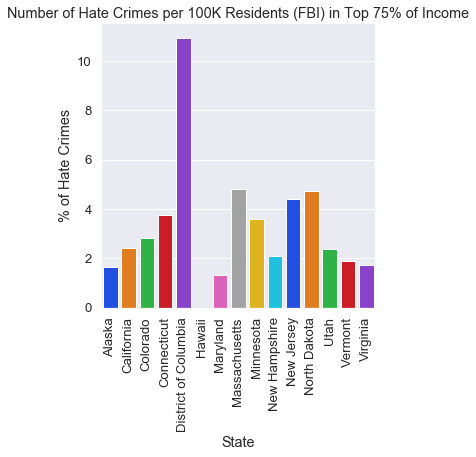

In [269]:
# Number of hate crimes per 100k for the top 75% of income, as per FBI
sns.catplot(x='state', y='avg_hc_per_100K_fbi', kind='bar', data=top75income_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Number of Hate Crimes per 100K Residents (FBI) in Top 75% of Income')
plt.xlabel('State')
plt.ylabel('% of Hate Crimes');

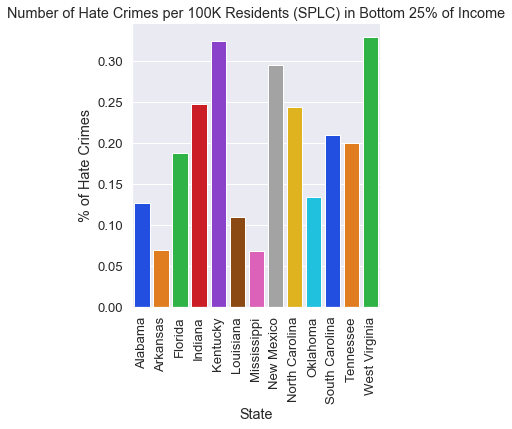

In [270]:
# Number of hate crimes per 100k for the bottom 25% of income, as per SPLC
sns.catplot(x='state', y='hc_per_100K_splc', kind='bar', data=bottom25income_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Number of Hate Crimes per 100K Residents (SPLC) in Bottom 25% of Income')
plt.xlabel('State')
plt.ylabel('% of Hate Crimes');

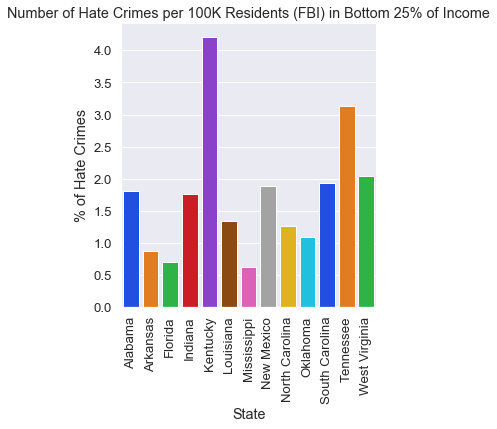

In [271]:
# Number of hate crimes per 100k for the bottom 25% of income, as per FBI
sns.catplot(x='state', y='avg_hc_per_100K_fbi', kind='bar', data=bottom25income_df, palette= 'bright')
plt.xticks(rotation=90)
plt.title('Number of Hate Crimes per 100K Residents (FBI) in Bottom 25% of Income')
plt.xlabel('State')
plt.ylabel('% of Hate Crimes');

**Important Takeaways:**
- In the top 75% of income we only really see one state (D.C.) with a high incidence of hate crimes.
- In the bottom 25% of income we see three states (Kentucky, West Virginia, and Tenessee) with high incidences of hate crimes.
- In the top 75% of median household income we see three of our five top states for hate crimes (D.C., Minnesota, and Massachusetts) but none of our top five states appear in the bottom 25% of income.
- Overall, the reported incidence of hate crimes, as per the SPLC, is much higher in the top 75% of income in the U.S.


### 2.2c: Question 3: Are the number of Trump supporters and hate crimes related?
[Return to Outline](#Project-Outline)

Since we have now looked at the distribution of income across the general population and in our top 5 states for hate crimes let's now take a closer look at how, if at all, Trump supporters are related to hate crimes.

In [181]:
# What does the information we have about Trump voters actually look like?
df['%_voters_trump'].describe()

count    51.00000
mean      0.49000
std       0.11871
min       0.04000
25%       0.41500
50%       0.49000
75%       0.57500
max       0.70000
Name: %_voters_trump, dtype: float64

In [182]:
# Let's focus on states who had at least 49% of their voting population vote for Trump in 2016
trump_df= df.loc[df['%_voters_trump']> 0.48]
trump_df

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,South,East South Central
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,West,Pacific
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,West,Mountain
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,South,West South Central
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521,0.698070,South,South Atlantic
10,Georgia,49555,0.058,0.82,0.839,0.08,0.09,0.468,0.48,0.51,0.120420,0.412012,South,South Atlantic
12,Idaho,53438,0.042,0.70,0.884,0.04,0.11,0.433,0.16,0.59,0.124208,1.891331,West,Mountain
14,Indiana,48060,0.044,0.79,0.866,0.03,0.12,0.440,0.20,0.57,0.247009,1.757357,Midwest,East North Central
15,Iowa,57810,0.036,0.60,0.914,0.03,0.09,0.427,0.15,0.52,0.454427,0.561396,Midwest,West North Central
16,Kansas,53444,0.044,0.64,0.897,0.04,0.11,0.445,0.25,0.57,0.105152,2.143987,Midwest,West North Central


In [183]:
# What states are included in our new subset?
trump_df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia',
       'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'West Virginia', 'Wyoming'], dtype=object)

We have 27 states out of 51 (including D.C.) that had more than 48% of all voting residents vote for Trump in the 2016 election. What do hate crimes look like in this subgroup? 

''

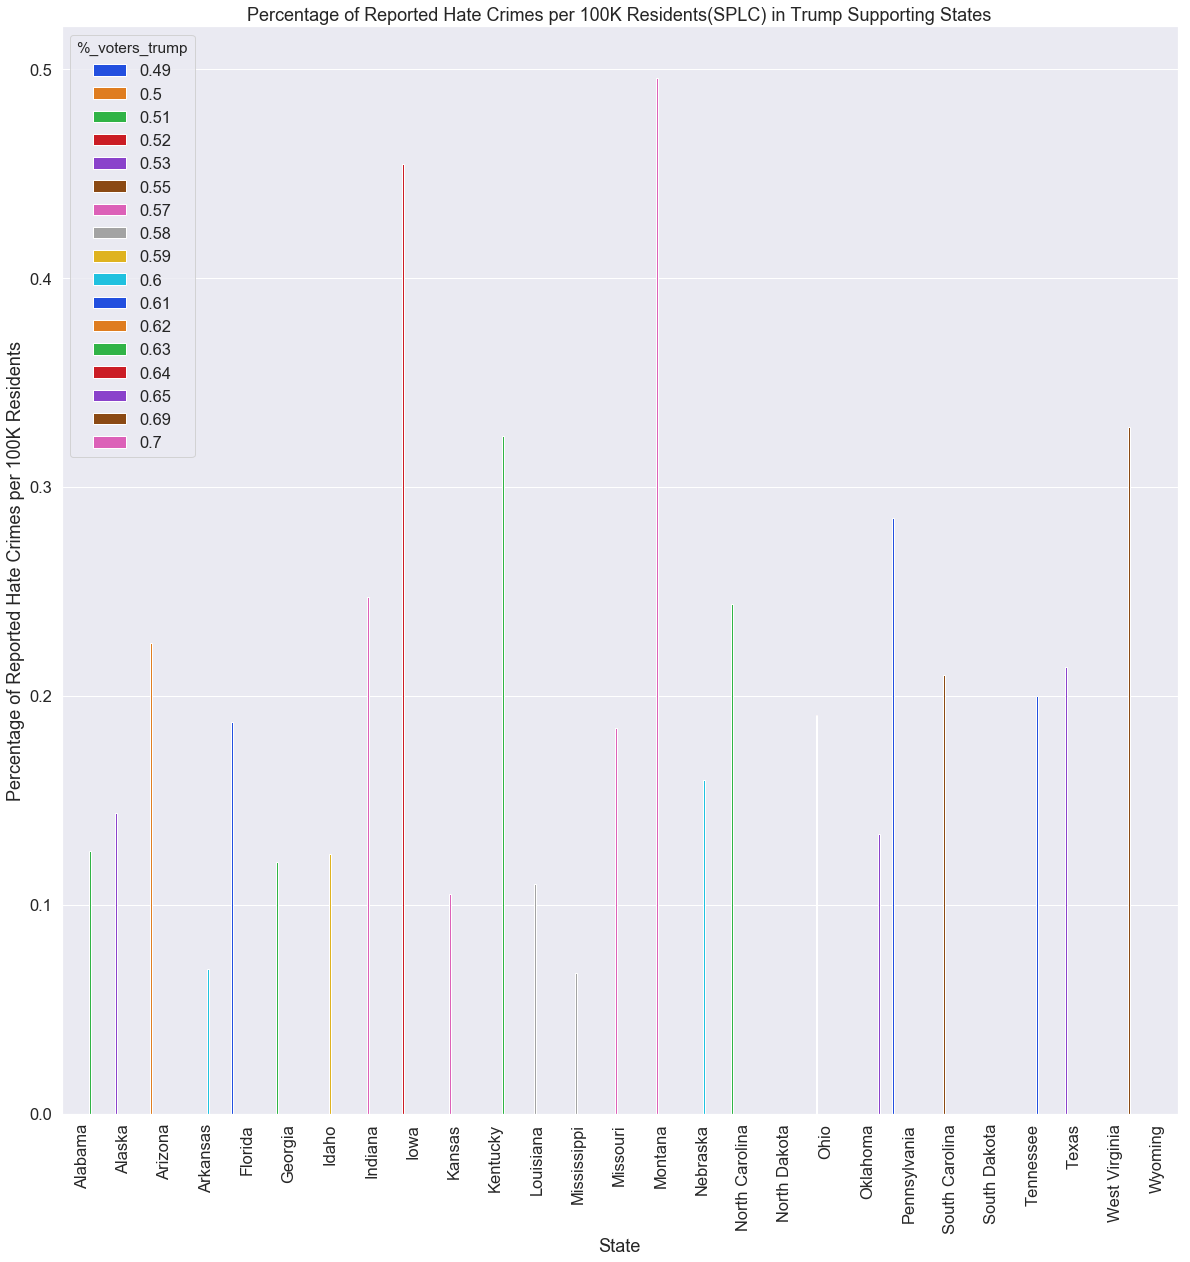

In [190]:
# Visualizing hate crimes per 100k for SPLC in Trump voting states
plt.figure(figsize= (20, 20))
sns.set(font_scale= 1.5)
sns.barplot(x= trump_df['state'], y= trump_df['hc_per_100K_splc'], hue= trump_df['%_voters_trump'], data= trump_df, palette= 'bright')
plt.xticks(rotation = 90)
plt.title('Percentage of Reported Hate Crimes per 100K Residents(SPLC) in Trump Supporting States')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

Since there so many states and it is hard to decipher this visual let's break these states into regions to see if that helps any.

In [191]:
# Let's look at what regions we have represented in this subset
trump_df['region'].unique()

array(['South', 'West', 'Midwest', 'Northeast'], dtype=object)

We have all of the four major regions represented in this subset. Let's start looking at each region individually.

''

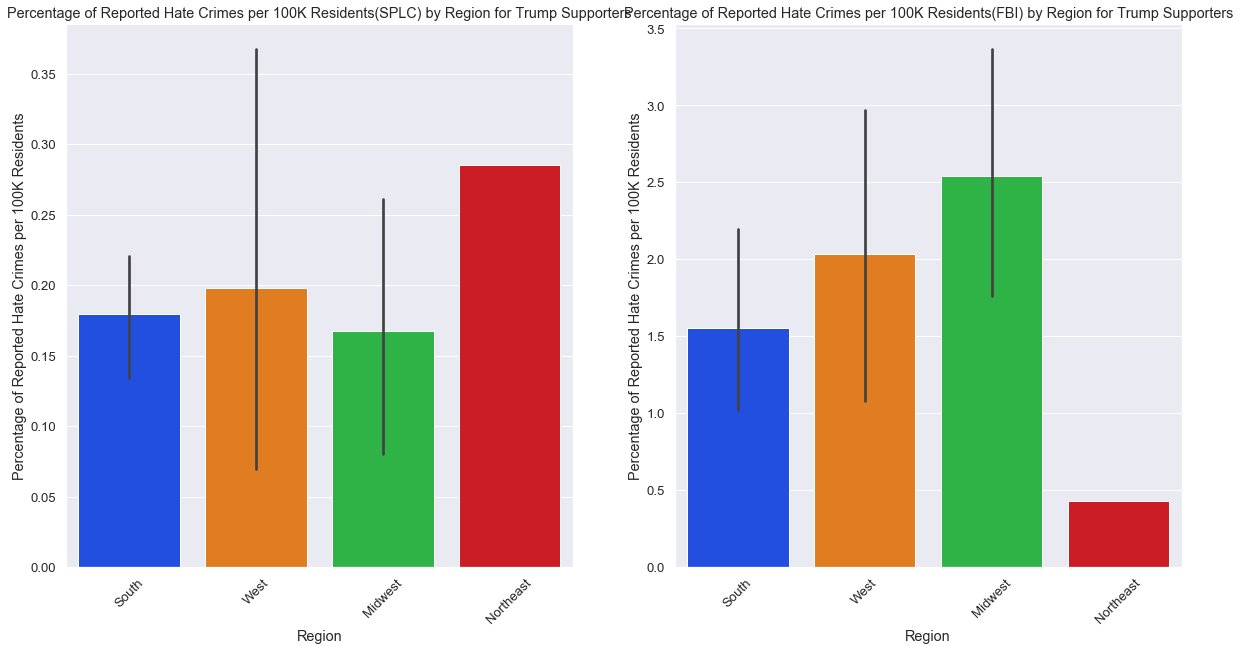

In [228]:
# Let's look at the data by region first
plt.figure(figsize= (20, 10))

plt.subplot(1,2,1)
sns.barplot(x= trump_df['region'], y= df['hc_per_100K_splc'], data= trump_df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Reported Hate Crimes per 100K Residents(SPLC) by Region for Trump Supporters')
plt.xlabel('Region')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

plt.subplot(1,2,2)
sns.barplot(x= trump_df['region'], y= df['avg_hc_per_100K_fbi'], data= trump_df,  palette= 'bright')
plt.xticks(rotation = 45)
plt.title('Percentage of Reported Hate Crimes per 100K Residents(FBI) by Region for Trump Supporters')
plt.xlabel('Region')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

**Takeaways:**
- Interestingly the stats on number of hatec rimes per 100k residents really differs here between the SPLC and the FBI
- According to the SPLC states in the Northeast with a larger number of Trump voters also have the highest incidence of hate crimes
- In the SPLC data three regions (South, West, and Midwest) we observe whisker lines longer than the original bar indicating that there are some weird outliers in those regions (we will dive deeper into those in a minute!)

- According to the FBI statistics the area of Trump voters with the highest incidence of hate crimes is the Midwest with oevr 3.5%.
- In the FBI data two regions (South and West) have weird outliers worth taking a deeper look at.

In looking at the information for this question it occured to me that it might be valuable to take a closer look at the original documentation for the variables and determine the difference between the two reporting statistics. Upon closer inspection we see that the SPLC reports are for a two week period in 2016, while the FBI reports are the average annual incidences of hate crimes from 2010-2015. Knowing that, we can now see that the SPLC reports are designed to be more directly related to the election of Donald Trump in 2016 while the FBI reports are an overall figure.

In [203]:
# Let's look closer at the weird outliers we found above!

# Creating subdatasets for each of the regions in the chart above
trump_south_df= trump_df.loc[trump_df['region']== 'South']
trump_west_df= trump_df.loc[trump_df['region']== 'West']
trump_midwest_df= trump_df.loc[trump_df['region']== 'Midwest']
trump_ne_df= trump_df.loc[trump_df['region']== 'Northeast']

''

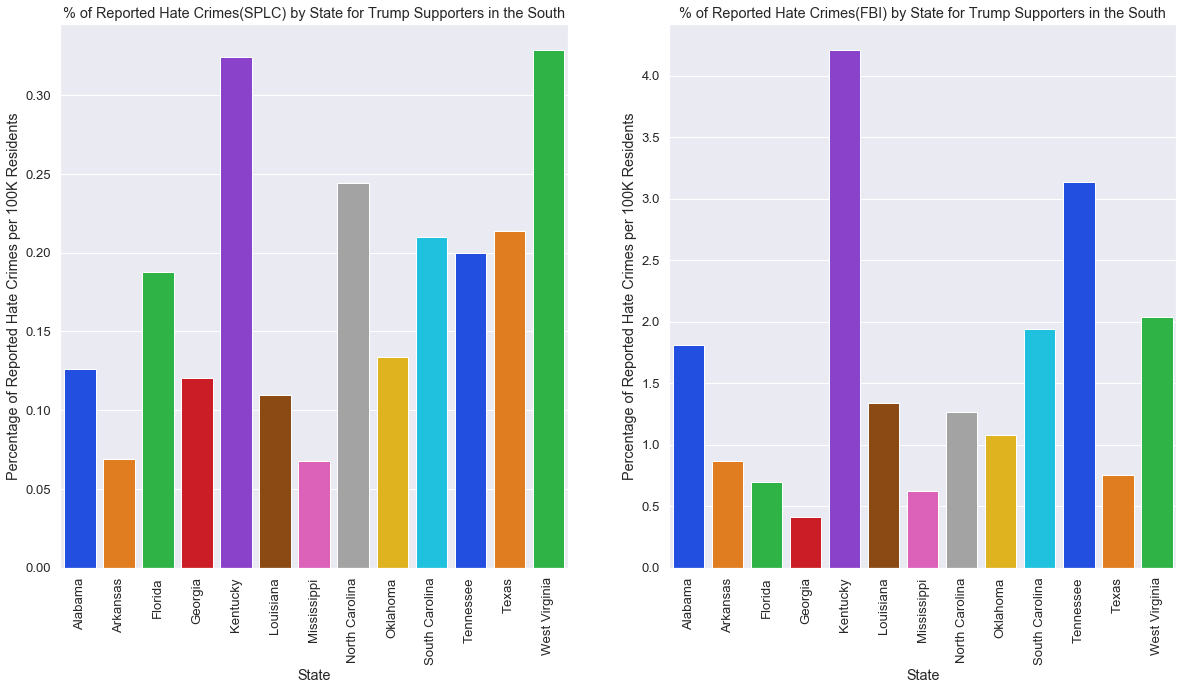

In [217]:
# Let's look at the stats in the South region for both reporting agencies
plt.figure(figsize= (20, 10))
plt.tight_layout()
sns.set(font_scale= 1.2)


plt.subplot(1,2, 1)
sns.barplot(x= trump_south_df['state'], y= trump_south_df['hc_per_100K_splc'], data= trump_south_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(SPLC) by State for Trump Supporters in the South')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

plt.subplot(1,2, 2)
sns.barplot(x= trump_south_df['state'], y= trump_south_df['avg_hc_per_100K_fbi'], data= trump_south_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(FBI) by State for Trump Supporters in the South')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

''

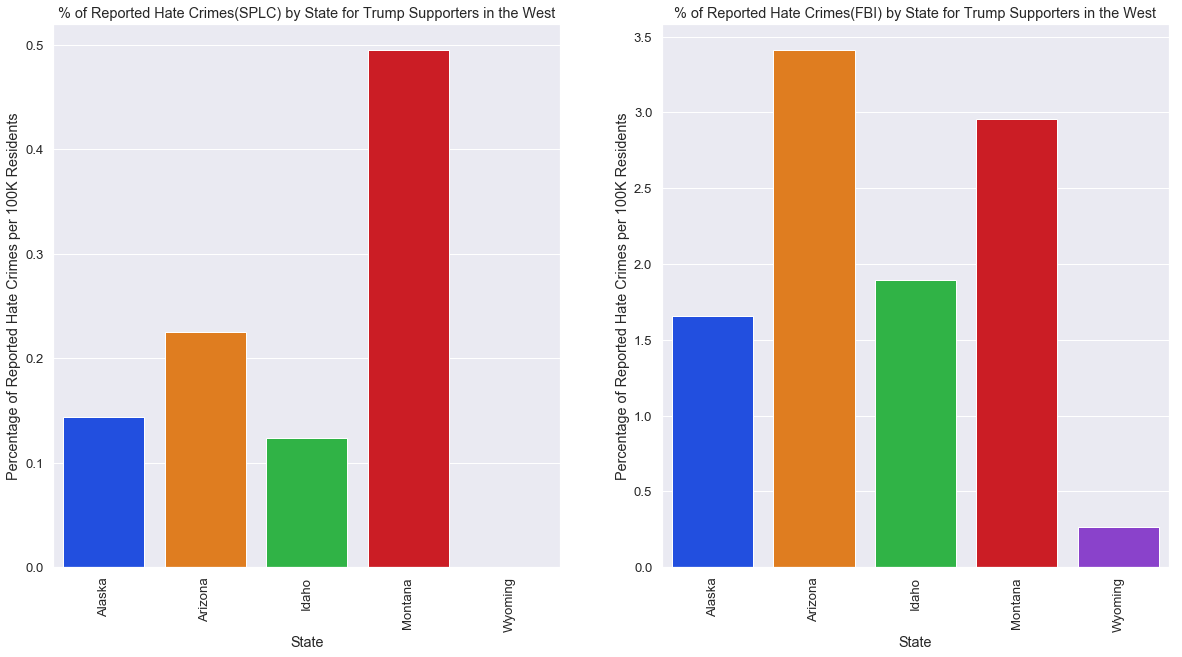

In [212]:
# Let's look at the stats in the West region for both reporting agencies
plt.figure(figsize= (20, 10))
plt.tight_layout()
sns.set(font_scale= 1.2)


plt.subplot(1,2, 1)
sns.barplot(x= trump_west_df['state'], y= trump_west_df['hc_per_100K_splc'], data= trump_west_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(SPLC) by State for Trump Supporters in the West')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

plt.subplot(1,2, 2)
sns.barplot(x= trump_west_df['state'], y= trump_west_df['avg_hc_per_100K_fbi'], data= trump_west_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(FBI) by State for Trump Supporters in the West')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

''

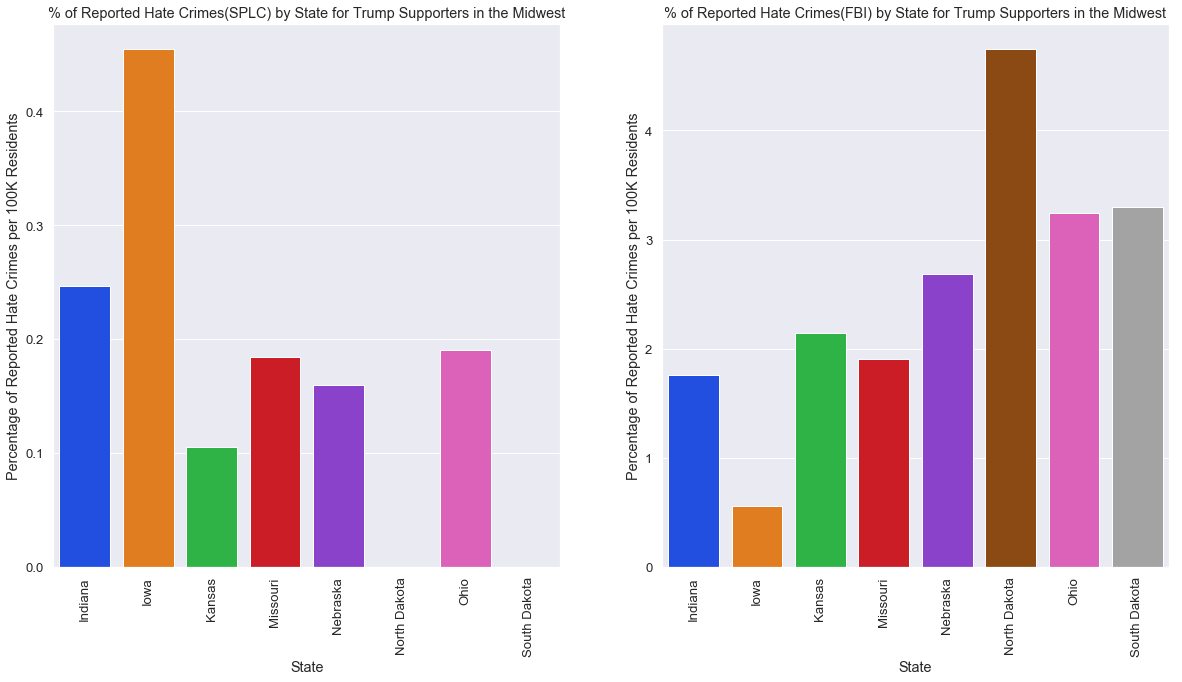

In [214]:
# Let's look at the stats in the Midwest region for both reporting agencies
plt.figure(figsize= (20, 10))
plt.tight_layout()
sns.set(font_scale= 1.2)


plt.subplot(1,2, 1)
sns.barplot(x= trump_midwest_df['state'], y= trump_midwest_df['hc_per_100K_splc'], data= trump_midwest_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(SPLC) by State for Trump Supporters in the Midwest')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

plt.subplot(1,2, 2)
sns.barplot(x= trump_midwest_df['state'], y= trump_midwest_df['avg_hc_per_100K_fbi'], data= trump_midwest_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(FBI) by State for Trump Supporters in the Midwest')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

''

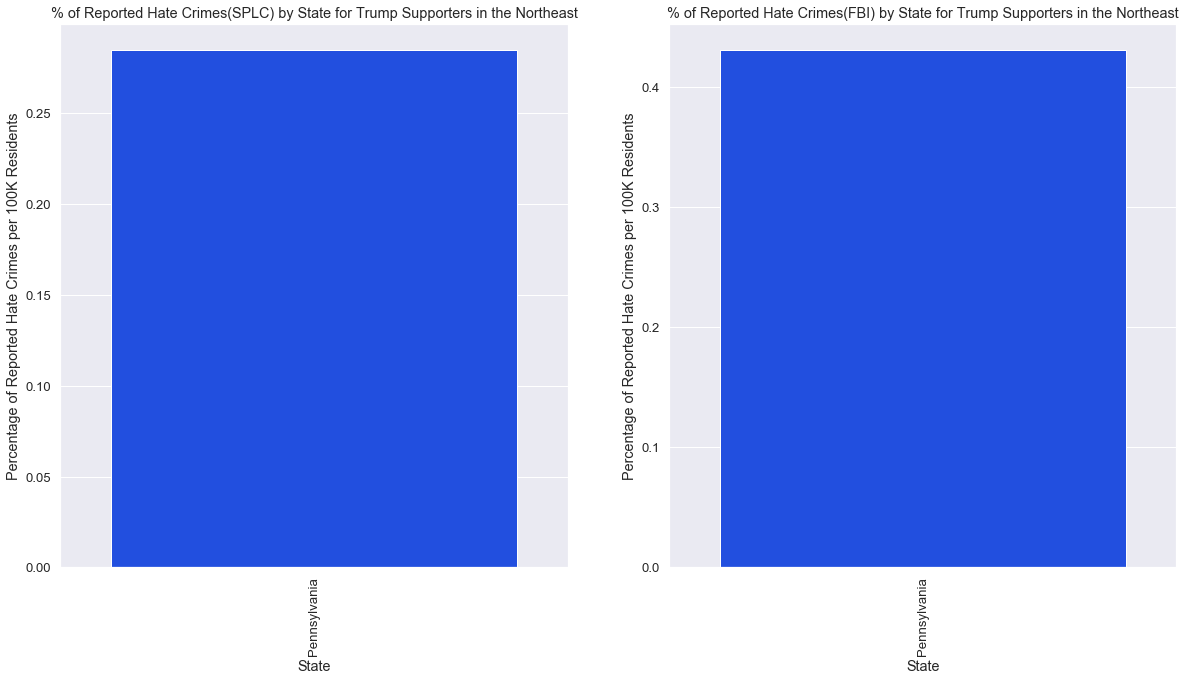

In [215]:
# Let's look at the stats in the Northeast region for both reporting agencies
plt.figure(figsize= (20, 10))
plt.tight_layout()
sns.set(font_scale= 1.2)


plt.subplot(1,2, 1)
sns.barplot(x= trump_ne_df['state'], y= trump_ne_df['hc_per_100K_splc'], data= trump_ne_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(SPLC) by State for Trump Supporters in the Northeast')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

plt.subplot(1,2, 2)
sns.barplot(x= trump_ne_df['state'], y= trump_ne_df['avg_hc_per_100K_fbi'], data= trump_ne_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('% of Reported Hate Crimes(FBI) by State for Trump Supporters in the Northeast')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

**Takeaways:**
Now that we know that the SPLC statistics are for the weeks following the election of Trump we see some very interesting things jump out at us:
- Kentucky had elevated hate crimes reported after the election (though this may be a moot point as they already experience elevated incidences of hate crimes annually)
- Virginia saw a large spike in hate crimes after the election- way more than expected as per annual averaged
- Not typically a large reporting area of hate crimes Montana saw a surge in hate crime incidents after the election as well
- Iowa, who typically reports very few hate crimes annually, also saw a surge in hate crime incidents after the election

### 2.2d: Question 4: What do states with a large number of individuals who supported Trump look like?
[Return to Outline](#Project-Outline)

For this question I want to know, overall, what the main states who voted for Trump look like in all of the available features. This should be pretty straightforward, now that we have a seperate subset for this data!

In [218]:
trump_df.describe(include= 'all')

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division
count,27,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27,27
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8
top,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,West North Central
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,6
mean,NaN,49932.962963,0.049667,0.677037,0.86063,0.038148,0.102963,0.451963,0.283333,0.575926,0.183308,1.893362,NaN,NaN
std,NaN,7079.698839,0.011184,0.169497,0.03686,0.027740,0.024466,0.016526,0.136128,0.058458,0.122160,1.217680,NaN,NaN
min,NaN,35521.000000,0.028000,0.310000,0.79900,0.000000,0.060000,0.422000,0.070000,0.490000,0.000000,0.266941,NaN,NaN
25%,NaN,44925.500000,0.042000,0.575000,0.82950,0.020000,0.090000,0.437500,0.165000,0.525000,0.115077,0.810989,NaN,NaN
50%,NaN,49555.000000,0.052000,0.690000,0.85600,0.030000,0.100000,0.455000,0.250000,0.570000,0.184524,1.806410,NaN,NaN
75%,NaN,54524.000000,0.058000,0.800000,0.89750,0.040000,0.120000,0.467000,0.400000,0.615000,0.234663,2.820604,NaN,NaN


# **Describe what you see above here**

### 2.2e: Question 5: What do rural areas look like vs. metro areas in regards to hate crimes?
[Return to Outline](#Project-Outline)

In [219]:
# Before we can create subsets of our data we need to understand what the metro population feature looks like overall
df['pop_in_metro_areas'].describe()

count    51.000000
mean      0.750196
std       0.181587
min       0.310000
25%       0.630000
50%       0.790000
75%       0.895000
max       1.000000
Name: pop_in_metro_areas, dtype: float64

In [221]:
# Let's create subsets to look at the two areas

# Creating a subset for states in top 75% of metro pop
metro_df= df.loc[df['pop_in_metro_areas']> 0.88]

# Creating a subset for states in botton 25% of metro pop
rural_df= df.loc[df['pop_in_metro_areas']< 0.64]


,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division,hc_mean
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,West,Mountain,1.819624
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,West,Pacific,1.326896
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701,Northeast,New England,2.054047
7,Delaware,57522,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754,1.469980,South,South Atlantic,0.896367
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480,South,South Atlantic,6.237891


In [222]:
# What does the top 75% of pop in metro areas look like?
metro_df

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division,hc_mean
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,West,Mountain,1.819624
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,West,Pacific,1.326896
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701,Northeast,New England,2.054047
7,Delaware,57522,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754,1.469980,South,South Atlantic,0.896367
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480,South,South Atlantic,6.237891
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521,0.698070,South,South Atlantic,0.442796
13,Illinois,54916,0.054,0.90,0.864,0.07,0.07,0.465,0.37,0.39,0.195345,1.044016,Midwest,East North Central,0.619680
20,Maryland,76165,0.051,0.97,0.890,0.08,0.06,0.443,0.50,0.35,0.370439,1.324840,South,South Atlantic,0.847639
21,Massachusetts,63151,0.046,0.97,0.890,0.09,0.08,0.475,0.27,0.34,0.630811,4.801899,Northeast,New England,2.716355
30,New Jersey,65243,0.056,1.00,0.874,0.11,0.07,0.464,0.44,0.42,0.078306,4.413203,Northeast,Mid-Atlantic,2.245754


In [223]:
# What does the bottom 25% of pop in metro areas look like?
rural_df

,state,median_household_income,unemployed_seasonal,pop_in_metro_areas,pop_hs_degree,%_noncitizen,%_white_poverty,gini_index,%_nonwhite,%_voters_trump,hc_per_100K_splc,avg_hc_per_100K_fbi,region,division,hc_mean
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,West,Pacific,0.900220
15,Iowa,57810,0.036,0.60,0.914,0.03,0.09,0.427,0.15,0.52,0.454427,0.561396,Midwest,West North Central,0.507911
17,Kentucky,42786,0.050,0.56,0.817,0.03,0.17,0.466,0.15,0.63,0.324397,4.207890,South,East South Central,2.266143
19,Maine,51710,0.044,0.54,0.902,0.00,0.12,0.437,0.09,0.45,0.615574,2.626611,Northeast,New England,1.621092
24,Mississippi,35521,0.061,0.45,0.804,0.00,0.14,0.468,0.44,0.58,0.067447,0.622746,South,East South Central,0.345096
26,Montana,51102,0.041,0.34,0.908,0.01,0.10,0.435,0.10,0.57,0.495491,2.954959,West,Mountain,1.725225
27,Nebraska,56870,0.029,0.60,0.898,0.05,0.07,0.432,0.21,0.60,0.159490,2.686248,Midwest,West North Central,1.422869
29,New Hampshire,73397,0.034,0.63,0.913,0.03,0.06,0.425,0.09,0.47,0.151550,2.105989,Northeast,New England,1.128769
34,North Dakota,60730,0.028,0.50,0.901,0.03,0.09,0.433,0.15,0.64,0.000000,4.741070,Midwest,West North Central,2.370535
36,Oklahoma,47199,0.044,0.59,0.856,0.04,0.10,0.454,0.35,0.65,0.133629,1.081672,South,West South Central,0.607651


In [272]:
# Let's take a look at what hate crimes look like (anually) in these areas
metro_df['avg_hc_per_100K_fbi'].describe()

count    14.000000
mean      2.939454
std       2.681697
min       0.698070
25%       1.293139
50%       2.061370
75%       3.683008
max      10.953480
Name: avg_hc_per_100K_fbi, dtype: float64

In [225]:
rural_df['avg_hc_per_100K_fbi'].describe()

count    14.000000
mean      2.196721
std       1.337897
min       0.266941
25%       1.225429
50%       2.071521
75%       2.887782
max       4.741070
Name: avg_hc_per_100K_fbi, dtype: float64

''

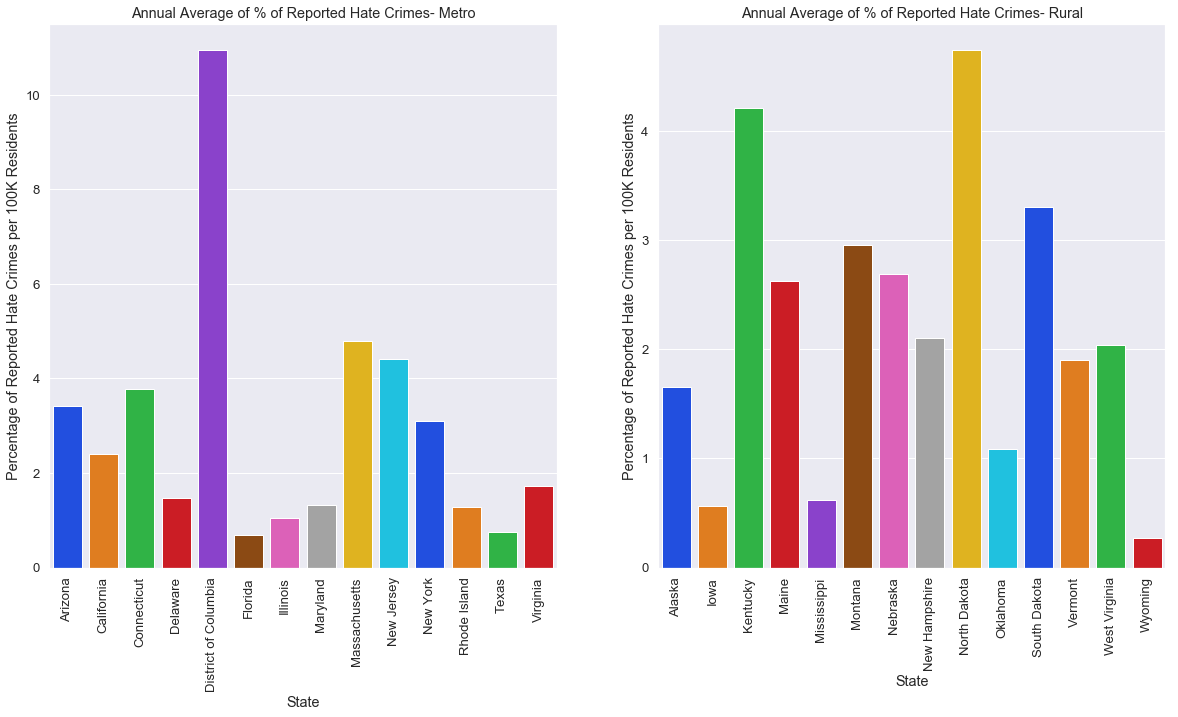

In [226]:
# Looking at the info visually
# Let's look at the stats in the Midwest region for both reporting agencies
plt.figure(figsize= (20, 10))
plt.tight_layout()
sns.set(font_scale= 1.2)


plt.subplot(1,2, 1)
sns.barplot(x= metro_df['state'], y= metro_df['avg_hc_per_100K_fbi'], data= metro_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('Annual Average of % of Reported Hate Crimes- Metro')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;

plt.subplot(1,2, 2)
sns.barplot(x= rural_df['state'], y= rural_df['avg_hc_per_100K_fbi'], data= rural_df,  palette= 'bright')
plt.xticks(rotation = 90)
plt.title('Annual Average of % of Reported Hate Crimes- Rural')
plt.xlabel('State')
plt.ylabel('Percentage of Reported Hate Crimes per 100K Residents')
;


**Takeaways:**
- Overall metro areas (areas with at least 80% of the population residing in metro areas) see higher incidences of hate crimes annually than rural areas.
- Only two of our top five states for hate crimes (D.C. and Massachusetts) appear in either the metro or rural populations.
- Four states stand out on both rural and metro areas as outliers (D.C., North Dakota, South Dakota, and Kentucky)

### 2.3: Overall Takeways/Implications of Data
[Return to Outline](#Project-Outline)

While analyzing and visualizing the information in this dataset there were several important trends that stood out:
- In areas with the largest discrepencies in income hate crimes are occur more frequently
- Hate crimes are more prevalent in states with larger populations in metro areas
- In states where a majority of the voting population voted for Trump in the 2016 election larger spikes in hate crime were seen

This project brings several important issues to light as well, such as:
- How accurate are these figures for the reporting of hate crimes? As seen with the mass shooting at a Walmart in El Paso, Texas people who are of color, non-citizens, or those who speak another first language besides English are more reluctant to report crimes
- What is defined as a hate crime varries from state to state in the U.S. Some states, such as Texas, do not consider crimes related to sexual orientation as hate crimes.
- People who are experiencing extreme economic inequality are angry and more likely to lash out at others. What can we do, as a society to help this?
- If these are the figures for the United States, what do hate crimes look like in other countries and how do we, as a country compare?



## 3. Even More Visualizations!
[Return to Outline](#Project-Outline)

All of the above visualizations and analysis are great if you already know how to manipulate data using pandas and Python, but what if we have questions later and want to know more information? 

I've created an interactive Tableau dashboard below for this dataset to allow you to play with the data and investigate any questions you might have in the future!

# **Insert a Tableau dashboard map here!** 

## 4. Reflection/Future Implications
[Return to Outline](#Project-Outline)

### 4.1: Future Implications
[Return to Outline](#Project-Outline)

As the old adage says: "Those who do not heed history are doomed to repeat it". By analyzing data about hate crimes in the United States over specific time periods we may be able to identify patterns (behaviors, events, social factors, etc) that could help us create models to help predict and forwarn others in the future about situations that may lead to hate crimes. 

### 4.2: Reflection
[Return to Outline](#Project-Outline)

I am, at heart, a visualization nerd, so I thoroughly enjoyed this project. I am always interested in how data reflect social conditions and what we can learn about human interactions through raw data. This project demonstrated to me the importance of easy to understand visuals as a way to breakdown what the data are telling us. Prior to this project I had no experience in Tableau and I am thankful for the opportunity to learn more about the program using this dataset.


I would love to continue working on this project as my skills grow, as I feel there are so many ways to expand on what I have already done. One such way would be to connect this data to the U.S. Census data for the same time period to see what patterns we can glean from additional background and demographic information. I would also like to add more time frames to the original data to see if there are any historical trends that repeat themselves. Finally, I would love to use this analysis as the basis to build a model to help predict where/when incidences of hate crimes may occur.